# The Smith Parasite - Machine Learning Project
### An Unknown Parasitic Disease. Who is more likely to suffer from the Smith Parasite?

# 0. Problem Overview

**Data Dictionary**

 

| <center>Attribute</center> | <center>Description</center> | 
| --- | --- |
| <center>PatientID<center> | <center>The unique identifier of the patient<center> | 
| <center>Birth Year<center> | <center>Patient Year of Birth<center> |   
| <center>Name<center> | <center>Name of the patient<center>| 
| <center>Region<center> | <center>Patient Living Region<center> | 
| <center>Education<center> | <center>Answer to the question: What is the highest grade or year of school you have? <center>| 
| <center>Disease<center> | <center>The dependent variable. If the patient has the disease (Disease = 1) or not (Disease = 0)<center> | 
| <center>Height<center> | <center>Patient’s height<center> |
| <center>Weight<center> | <center>Patient’s weight<center> |
| <center>Checkup<center> | <center>Answer to the question: How long has it been since you last visited a doctor for a routine Checkup?<center> |
| <center>Diabetes<center> | <center>Answer to the question: (Ever told) you or your direct relatives have diabetes?<center> |
| <center>HighCholesterol<center> | <center>Cholesterol value<center> |
| <center>BloodPressure<center> |  <center>Blood Pressure in rest value<center> |
| <center>Mental Health<center> | <center>Answer to the question: During the past 30 days, for about how many<p><center> days did poor physicalor mental health keep you from doing your usual activities,<p><center> such as self-care, work, or recreation?<center>|
| <center>Physical Health<center> |  <center>Answer to the question: Thinking about your physical health, which includes<p><center> physical illness and injury,for how many days during the past 30 days was<p><center> your physical health not good to the point<p><center> where it was difficult to walk?<center> |
| <center>Smoking Habit<center> | <center>Answer to the question: Do you smoke more than 10 cigars daily?<center>|
| <center>Drinking Habit<center> | <center>Answer to the question: What is your behavior concerning alcohol consumption?<center>|
| <center>Exercise<center> | <center>Answer to the question: Do you exercise (more than 30 minutes) 3 times per week or more?<center>|
| <center>Fruit Habit<center> | <center>Answer to the question: How many portions of fruits do you consume per day?<center>|
| <center>Water Habit<center> | <center>Answer to the question: How much water do you drink per day?<center>|

 

 

* * *

#### Table of contents

1. [Libraries and functions](#title1)
2. [Data Importing and Joining](#title2)
3. [Data Exploration and Understanding](#title3) <br>
    3.1. [Data Overview](#subtitle3.1) <br>
    3.2. [Visual Exploration](#subtitle3.2)
4. [Data Pre-Processing](#title4) <br>
    4.1. [Filling Missing Values](#subtitle4.1) <br>
    4.2. [Removing Outliers](#subtitle4.2)
    - 4.2.1. [Manual Detection](#subtitle4.2.1)
    - 4.2.2. [IQR Detection](#subtitle4.2.2)
    - 4.2.3. [Combination of Manual and IQR](#subtitle4.2.3)
    - 4.2.4. [Replacing outliers with median](#subtitle4.2.4)
    - 4.2.5. [Replacing outliers with KNN Imputer](#subtitle4.2.5)
    4.3. [Feature Engineering](#subtitle4.3)<br>  
    4.4. [Feature Selection](#subtitle4.4)<br>
    - 4.4.1. [Filter Methods](#subtitle4.4.1)<br>
    - 4.4.2. [Wrapper Methods](#subtitle4.4.2)<br>
    - 4.4.3. [Embedded Methods](#subtitle4.4.3)<br>
    4.5. [Encoding nominal features](#subtitle4.5)<br>

5. [Data Partition](#title5) <br>
6. [Model Evaluation](#title6) <br>
    6.1. [Default Parameterized Models](#subtitle6.1)<br>
    6.2. [Optimitizing Best Models](#subtitle6.2)<br>
    6.3. [Ensemble Learning Methods](#subtitle6.3) <br>
7. [Model Assessment](#title7) <br>
8. [Final Model](#title8) <br>
9. [Importing Test Data](#title9) <br>

<a class="anchor" id="title1">


# 1. Libraries and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import statistics
import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE,mutual_info_classif

from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV

from sklearn.linear_model import LinearRegression,LogisticRegression,LassoCV
from sklearn.naive_bayes import CategoricalNB,GaussianNB

from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF,DotProduct,Matern,RationalQuadratic,WhiteKernel

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, \
                    recall_score, f1_score, ConfusionMatrixDisplay,RocCurveDisplay,roc_curve,roc_auc_score,\
                    precision_recall_curve

import time
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
color_palette=sns.diverging_palette(20,220,n=9)
color_defined='#3F7F93'

In [3]:
def hist_box_maker(df,titl, figx, figy):
    num_of_rows = len(df.columns)
    fig, axes = plt.subplots(num_of_rows, ceil((len(df.columns)*2)/num_of_rows), figsize=(figx, figy))
    fig.tight_layout(pad=0.20)
    temp = (list(df.columns)*2)
    temp.sort()
    # Iterate across axes objects and associate each histogram:
    i = 0 
    for ax, feat in zip(axes.flatten(), temp):
        if i%2 == 0:
            ax.hist(df[feat], bins = 50,color=color_defined)
            ax.set_title(feat,y=0.4,x=2.5)
            pltiswork=feat
        else:
            sns.boxplot(x=df[pltiswork], ax = ax,color=color_defined)
        i+=1    
    title = titl
    plt.suptitle(title,y=1.01)
    plt.show()

In [4]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,7.5))
    sns.heatmap(data = cor, annot = True, cmap = color_palette, fmt='.1')
    plt.show()

In [5]:
def plot_mi_scores(scores):
    plt.figure(dpi=100, figsize=(8, 5))
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores,color=color_defined)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [6]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(6,6))
    imp_coef.plot(kind = "barh",color=color_defined)
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [7]:
def avg_score(split_method,X,y,model):
    accuracy_score_train = []
    accuracy_score_test = []
    f1_score_train = []
    f1_score_test = []
    for train_index, test_index in split_method.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        #F1-score alculation
        f1_score_train.append(f1_score(y_train,train_predictions))
        f1_score_test.append(f1_score(y_test,test_predictions))
    
    train_average_f1_score = round(np.mean(f1_score_train),4)
    test_average_f1_score = round(np.mean(f1_score_test),4)
    return train_average_f1_score,test_average_f1_score;

In [8]:
def avg_score_RFE(split_method,X,y,model,n_features):
    score_test_rfe = []
    for train_index, test_index in split_method.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        rfe = RFE(model,n_features_to_select=n)
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)
        score = model.score(X_test_rfe,y_test)
    
        value_test_rfe = model.score(X_test_rfe,y_test)
        score_test_rfe.append(value_test_rfe)
    
    avg_score_test_rfe = round(np.mean(score_test_rfe),4)
    #print('\nTest average value for ',n_features,'features:' +  str(avg_score_test_rfe) + '+/-' + str(round(np.std(score_test_rfe),2)))
    return avg_score_test_rfe,X_train,y_train;

In [9]:
def plot_scores(labels,training_scores,validation_scores):
    
    sns.set()
    x = np.arange(len(training_scores))  # the label locations
    width = 0.20  # the width of the bars
    ##cf7c68
    ax = plt.axes()
    ax.set_facecolor("white")
    plt.axhline(y=0.8,linestyle='dashed',color='grey')

    plt.bar(x - width/2, training_scores, width, label='Training Score',color="#4A7A89")
    plt.bar(x + width/2, validation_scores, width, label='Validation Score',color="#c3d5db")


    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel('Scores')
    plt.title('Scores by Model',fontsize=16)
    plt.xticks(x, labels)
    plt.legend()
    plt.grid(visible=False)
    plt.tight_layout()
    plt.show()

In [10]:
# in anaconda prompt: conda install python-graphviz
# !pip install pydotplus
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X.columns,  
                               class_names=["No Disease", "Disease"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())

<a class="anchor" id="title2">

# 2. Data Importing and Joining

**Importing ___trainhealth___ , ___trainhabits___ and ___traindemo___**

In [11]:
# Train dataset is imported using pandas
train_health = pd.read_excel('train_health.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_demo = pd.read_excel('train_demo.xlsx')

In [12]:
train_health.head(1)

PatientID  Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
0       1167     155      67               358             120             21   

   Physical_Health            Checkup  \
0                2  More than 3 years   

                                           Diabetes  
0  Neither I nor my immediate family have diabetes.

In [13]:
train_habits.head(1)

PatientID Smoking_Habit                       Drinking_Habit Exercise  \
0       1167            No  I usually consume alcohol every day      Yes   

                                       Fruit_Habit  \
0  Less than 1. I do not consume fruits every day.   

                        Water_Habit  
0  Between one liter and two liters

In [14]:
train_demo.head(1)

PatientID                Name  Birth_Year  Region  \
0       1167  Mrs. Stephanie Gay        1965  London   

                                     Education  Disease  
0  High School Incomplete (10th to 11th grade)        1

**The train datasets are merged into one, in order to facilitate the data manipulation**

In [15]:
# index is defined as PatientId
train_demo.set_index('PatientID',inplace=True)
train_health.set_index('PatientID',inplace=True)
train_habits.set_index('PatientID',inplace=True)

print("Demo and habits inner join size:",train_demo.loc[train_demo.index.isin(train_habits.index)].shape[0])
print("Demo and health inner join size:",train_demo.loc[train_demo.index.isin(train_health.index)].shape[0])
print("Health and habits innser join size:",train_health.loc[train_demo.index.isin(train_habits.index)].shape[0])

Demo and habits inner join size: 800
Demo and health inner join size: 800
Health and habits innser join size: 800


As all the datasets have the same patients, they can be merged into one.

In [16]:
train_dataset = train_demo.join(train_health,how='inner')
train_dataset = train_dataset.join(train_habits,how='inner')
train_dataset.head(1)

Name  Birth_Year  Region  \
PatientID                                           
1167       Mrs. Stephanie Gay        1965  London   

                                             Education  Disease  Height  \
PatientID                                                                 
1167       High School Incomplete (10th to 11th grade)        1     155   

           Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                            
1167           67               358             120             21   

           Physical_Health            Checkup  \
PatientID                                       
1167                     2  More than 3 years   

                                                   Diabetes Smoking_Habit  \
PatientID                                                                   
1167       Neither I nor my immediate family have diabetes.            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       I usually consume alcohol every day      Yes   

                                               Fruit_Habit  \
PatientID                                                    
1167       Less than 1. I do not consume fruits every day.   

                                Water_Habit  
PatientID                                    
1167       Between one liter and two liters

<a class="anchor" id="title3">
    
# 3. Data Exploration and Understanding

<a class="anchor" id="subtitle3.1">

## 3.1 Data Overview

</a>
The data is copied from train_dataset to a new DataFrame to maintain the original version unchanged.

In [17]:
df = train_dataset.copy()

The empty cells are replaced by nan for further better analysis.

In [18]:
df.replace("",np.nan,inplace=True)

**Checking for data types**

In [19]:
df.dtypes

Name                object
Birth_Year           int64
Region              object
Education           object
Disease              int64
Height               int64
Weight               int64
High_Cholesterol     int64
Blood_Pressure       int64
Mental_Health        int64
Physical_Health      int64
Checkup             object
Diabetes            object
Smoking_Habit       object
Drinking_Habit      object
Exercise            object
Fruit_Habit         object
Water_Habit         object
dtype: object

**Checking for missing values**

In [20]:
df.isna().sum()

Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
dtype: int64

Only the Education variable has missing values which will be filled in later on.

**Checking for duplicated values**

In [21]:
df.duplicated().sum()

0

There are no duplicated values on the dataset.

**Generate descriptive statistics**

In [22]:
df.describe(include ='all').transpose()

count unique  \
Name                800    799   
Birth_Year        800.0    NaN   
Region              800     10   
Education           787      6   
Disease           800.0    NaN   
Height            800.0    NaN   
Weight            800.0    NaN   
High_Cholesterol  800.0    NaN   
Blood_Pressure    800.0    NaN   
Mental_Health     800.0    NaN   
Physical_Health   800.0    NaN   
Checkup             800      4   
Diabetes            800      4   
Smoking_Habit       800      2   
Drinking_Habit      800      3   
Exercise            800      2   
Fruit_Habit         800      5   
Water_Habit         800      3   

                                                               top freq  \
Name                                               Mr. Gary Miller    2   
Birth_Year                                                     NaN  NaN   
Region                                               East Midlands  154   
Education                    University Complete (3 or more years)  239   
Disease                                                        NaN  NaN   
Height                                                         NaN  NaN   
Weight                                                         NaN  NaN   
High_Cholesterol                                               NaN  NaN   
Blood_Pressure                                                 NaN  NaN   
Mental_Health                                                  NaN  NaN   
Physical_Health                                                NaN  NaN   
Checkup                                          More than 3 years  429   
Diabetes          Neither I nor my immediate family have diabetes.  392   
Smoking_Habit                                                   No  673   
Drinking_Habit                 I usually consume alcohol every day  406   
Exercise                                                        No  536   
Fruit_Habit        Less than 1. I do not consume fruits every day.  452   
Water_Habit                       Between one liter and two liters  364   

                        mean        std     min     25%     50%     75%  \
Name                     NaN        NaN     NaN     NaN     NaN     NaN   
Birth_Year        1966.04375  15.421872  1855.0  1961.0  1966.0  1974.0   
Region                   NaN        NaN     NaN     NaN     NaN     NaN   
Education                NaN        NaN     NaN     NaN     NaN     NaN   
Disease              0.51375   0.500124     0.0     0.0     1.0     1.0   
Height             167.80625   7.976888   151.0   162.0   167.0   173.0   
Weight               67.8275   12.11347    40.0    58.0    68.0    77.0   
High_Cholesterol    249.3225  51.566631   130.0  213.75   244.0   280.0   
Blood_Pressure     131.05375  17.052693    94.0   120.0   130.0   140.0   
Mental_Health         17.345   5.385139     0.0    13.0    18.0    21.0   
Physical_Health      4.55875   5.449189     0.0     0.0     3.0     7.0   
Checkup                  NaN        NaN     NaN     NaN     NaN     NaN   
Diabetes                 NaN        NaN     NaN     NaN     NaN     NaN   
Smoking_Habit            NaN        NaN     NaN     NaN     NaN     NaN   
Drinking_Habit           NaN        NaN     NaN     NaN     NaN     NaN   
Exercise                 NaN        NaN     NaN     NaN     NaN     NaN   
Fruit_Habit              NaN        NaN     NaN     NaN     NaN     NaN   
Water_Habit              NaN        NaN     NaN     NaN     NaN     NaN   

                     max  
Name                 NaN  
Birth_Year        1993.0  
Region               NaN  
Education            NaN  
Disease              1.0  
Height             180.0  
Weight              97.0  
High_Cholesterol   568.0  
Blood_Pressure     200.0  
Mental_Health       29.0  
Physical_Health     30.0  
Checkup              NaN  
Diabetes             NaN  
Smoking_Habit        NaN  
Drinking_Habit       NaN  
Exercise             NaN  
Fruit_Habit          NaN  
Water_Habit          NaN

**Analysis of the describe method:**
- All the variables that need to be greater than 0 (Height, Weight, High_Cholesterol, Blood_Pressure, Mental_Health, Physical_Health) have no negative values.
- The Name variable has only 799 unique values and "Mr. Gary Miller" is repeated once, which means that we might have a repetead patient.
- The Birth Year has a minimum value of 1855, which is doubtful. Besides this, the difference between the minimum and the 25th percentile is considerably high (106). Thus, we must verify if it's an input error.
- Regarding the High_Cholestrol variable, we can verify a high standard deviation. Moreover, the difference between the maximum and the 75th percentile on the High_Cholesterol and the Blood_Pressure variables is noticeable. Therefore, a deeper analysis of outliers is needed.
- For the remaining numerical variables, the minimum, maximum, mean and standard deviation seem to be in accordance.
- For the categorical variables, it is possible to verify the correspondent number of classes. 

**Verifying if the data is balanced**

In [23]:
df['Disease'].value_counts(normalize=True)

1    0.51375
0    0.48625
Name: Disease, dtype: float64

The ratio of diseased and non diseased people is similar.

**Checking for repeated patients**

In [24]:
df.loc[df['Name'] == "Mr. Gary Miller"]

Name  Birth_Year      Region  \
PatientID                                            
1221       Mr. Gary Miller        1959  North West   
1694       Mr. Gary Miller        1983  South West   

                                       Education  Disease  Height  Weight  \
PatientID                                                                   
1221       University Complete (3 or more years)        0     172      65   
1694             I never attended school / Other        0     178      61   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1221                    258             130             17                6   
1694                    223             118             15                5   

            Checkup                                          Diabetes  \
PatientID                                                               
1221       Not sure  Neither I nor my immediate family have diabetes.   
1694       Not sure  Neither I nor my immediate family have diabetes.   

          Smoking_Habit                       Drinking_Habit Exercise  \
PatientID                                                               
1221                 No   I consider myself a social drinker       No   
1694                 No  I usually consume alcohol every day       No   

                                               Fruit_Habit  \
PatientID                                                    
1221                     1 to 2 pieces of fruit in average   
1694       Less than 1. I do not consume fruits every day.   

                                              Water_Habit  
PatientID                                                  
1221                               Less than half a liter  
1694       More than half a liter but less than one liter

It's possible to verify that both patients with the same name, correspond to different people.

**Checking unique values for inconsistences in categorical data**

In [25]:
pd.DataFrame(df['Region'].value_counts())

Region
East Midlands                154
London                       136
South West                   107
West Midlands                 89
South East                    84
East of England               80
Yorkshire and the Humber      64
North West                    59
North East                    22
LONDON                         5

In [26]:
pd.DataFrame(df['Education'].value_counts())

Education
University Complete (3 or more years)              239
High School Graduate                               196
Elementary School (1st to 9th grade)               183
High School Incomplete (10th to 11th grade)        102
University Incomplete (1 to 2 years)                37
I never attended school / Other                     30

In [27]:
pd.DataFrame(df['Checkup'].value_counts())

Checkup
More than 3 years                           429
Not sure                                    312
Less than 3 years but more than 1 year       53
Less than three months                        6

In [28]:
pd.DataFrame(df['Smoking_Habit'].value_counts())

Smoking_Habit
No             673
Yes            127

In [29]:
pd.DataFrame(df['Drinking_Habit'].value_counts())

Drinking_Habit
I usually consume alcohol every day              406
I consider myself a social drinker               383
I do not consume any type of alcohol              11

In [30]:
pd.DataFrame(df['Exercise'].value_counts())

Exercise
No        536
Yes       264

In [31]:
pd.DataFrame(df['Fruit_Habit'].value_counts())

Fruit_Habit
Less than 1. I do not consume fruits every day.          452
1 to 2 pieces of fruit in average                        175
3 to 4 pieces of fruit in average                        105
5 to 6 pieces of fruit in average                         56
More than six pieces of fruit                             12

In [32]:
pd.DataFrame(df['Water_Habit'].value_counts())

Water_Habit
Between one liter and two liters                        364
More than half a liter but less than one liter          352
Less than half a liter                                   84

**Analysis**

- For the region variable, the London value was written in two different ways, thus incorrectly assuming two different regions. This must be adjusted.
- Regarding the remaining categorical data, there are not inconsistencies, which should be treated. Additionally, we can verify that only Checkup cannot be transformed to ordinal data.

<a class="anchor" id="subtitle3.2">
    
## 3.2 Visual Exploration

**Defining metric and non-metric features**

In [33]:
non_metric_features = ["Name","Disease","Region","Education","Checkup","Diabetes","Smoking_Habit","Drinking_Habit","Exercise","Fruit_Habit","Water_Habit"]
metric_features = df.columns.drop(non_metric_features).to_list()
metric_features

['Birth_Year',
 'Height',
 'Weight',
 'High_Cholesterol',
 'Blood_Pressure',
 'Mental_Health',
 'Physical_Health']

In [34]:
non_metric_features

['Name',
 'Disease',
 'Region',
 'Education',
 'Checkup',
 'Diabetes',
 'Smoking_Habit',
 'Drinking_Habit',
 'Exercise',
 'Fruit_Habit',
 'Water_Habit']

In [35]:
def categorical_countplot (features):
    sns.set(font_scale=1)
    for each in range(len(features)):
        sns.countplot(y=features[each],hue='Disease',data=df,palette=['#3f7d93','#96b8c2'])
        plt.show()
    plt.show()

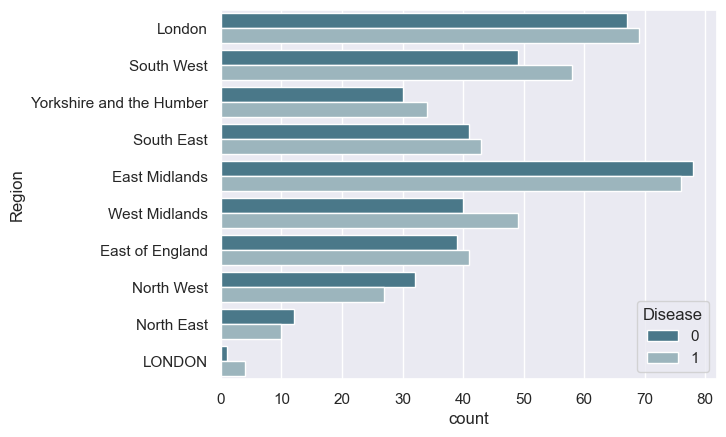

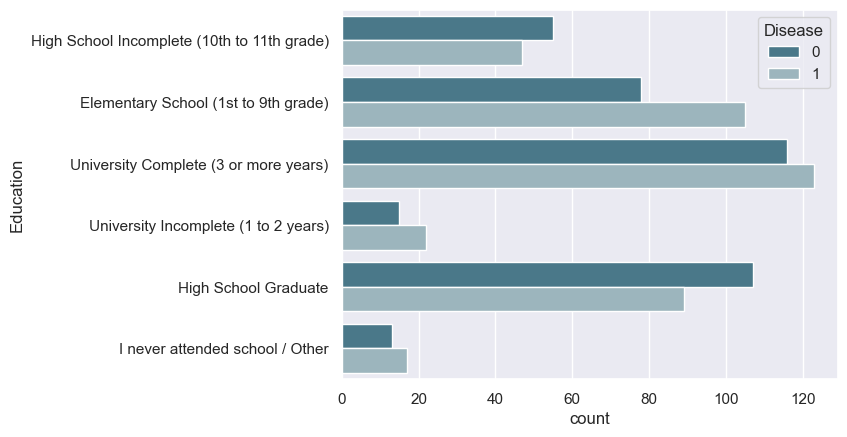

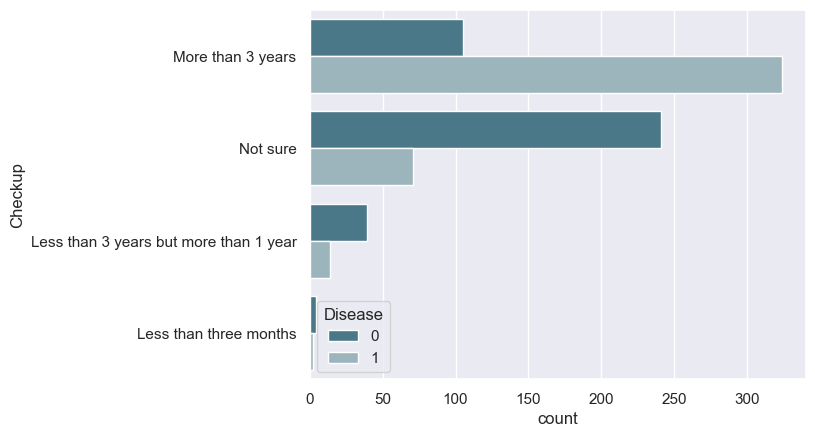

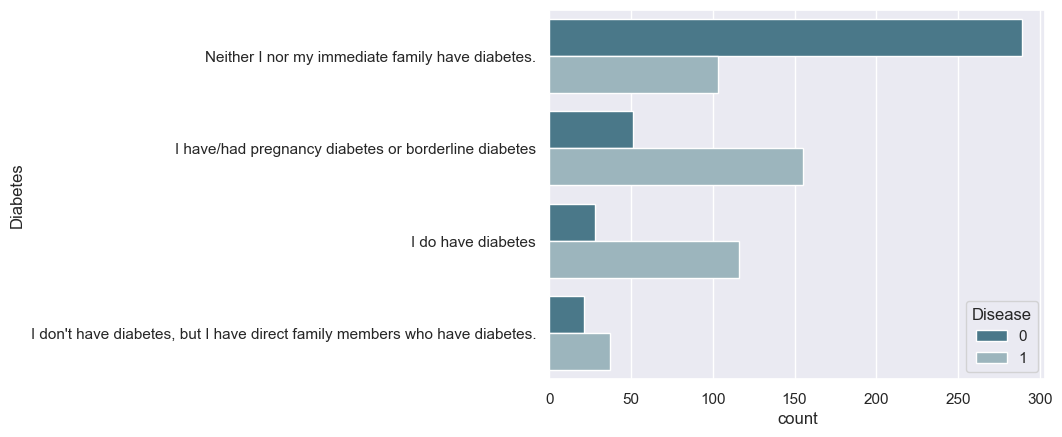

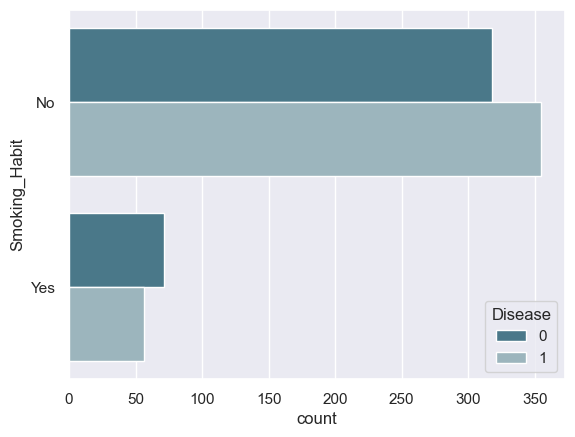

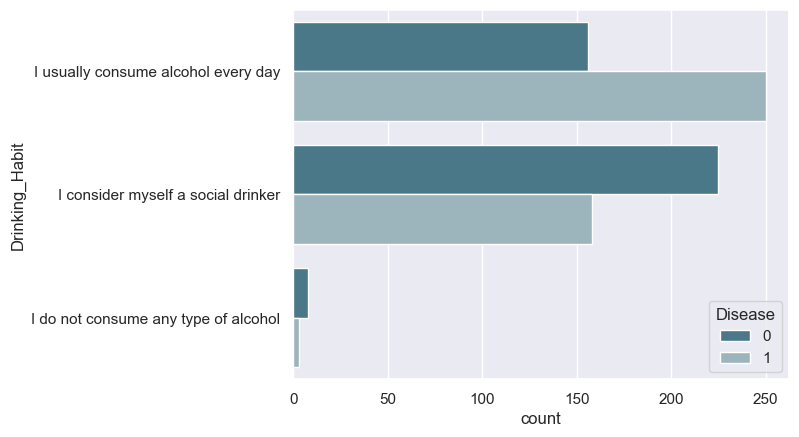

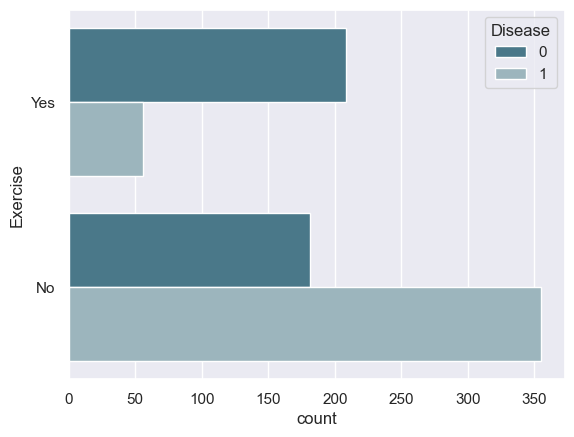

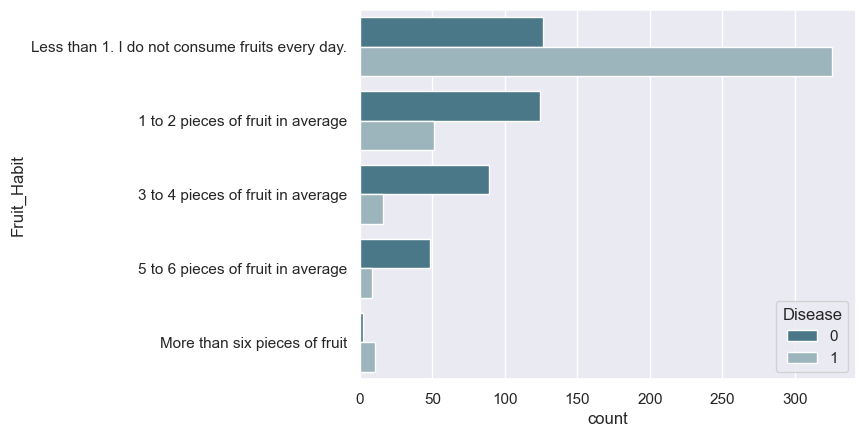

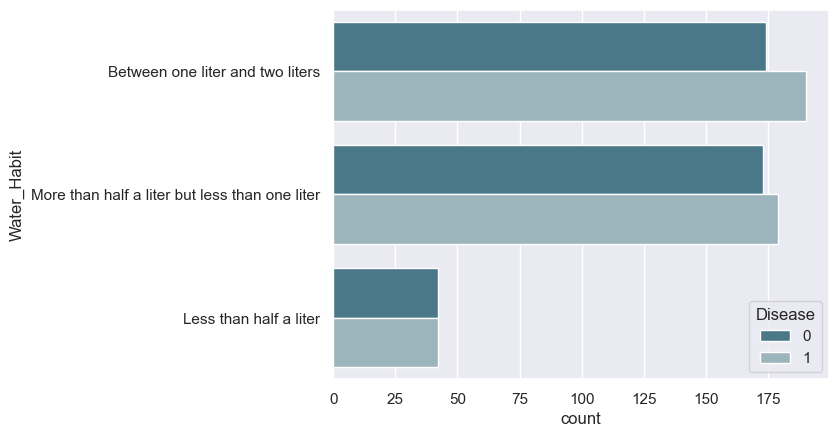

In [36]:
features_to_countplot=non_metric_features.copy()
features_to_countplot.remove('Name')
features_to_countplot.remove('Disease')
categorical_countplot(features_to_countplot)

**Outlier detection with histogram and boxplot visualization**

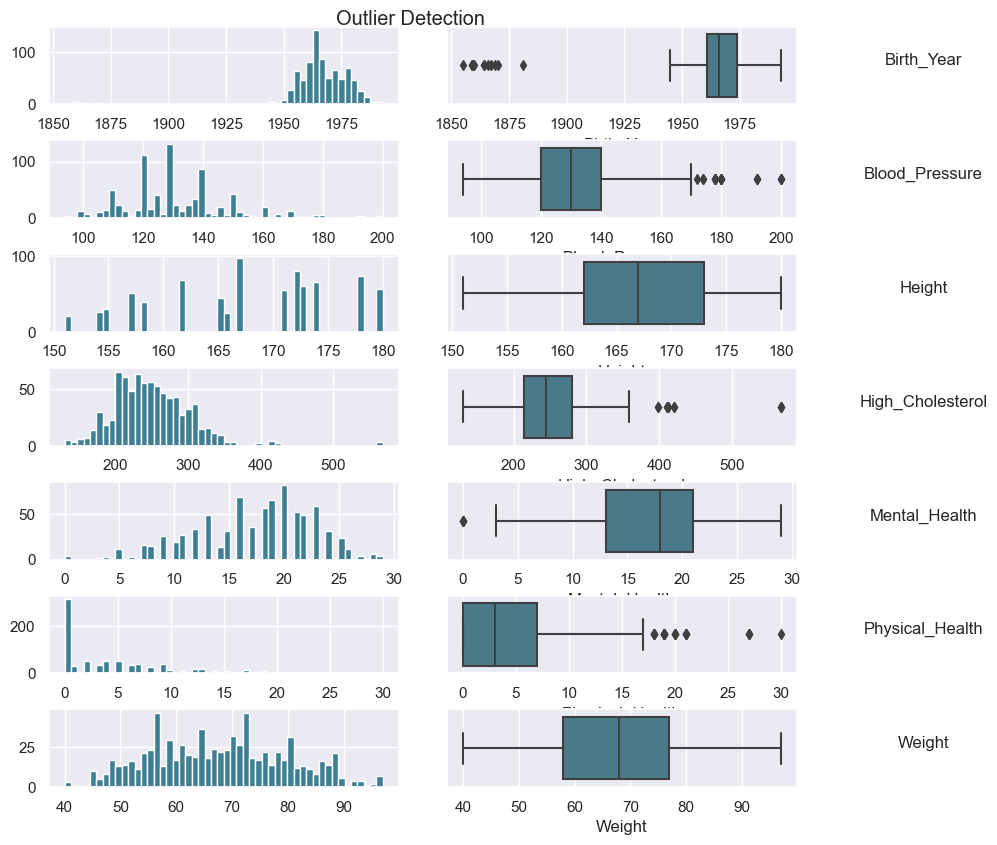

In [37]:
hist_box_maker(df[metric_features],"Outlier Detection",8,8)

It's possible to conclude that Birth_Year, High_Cholesterol, Blood_Pressure contains outliers.

**Correlation matrix with all metric features and dependent variable**

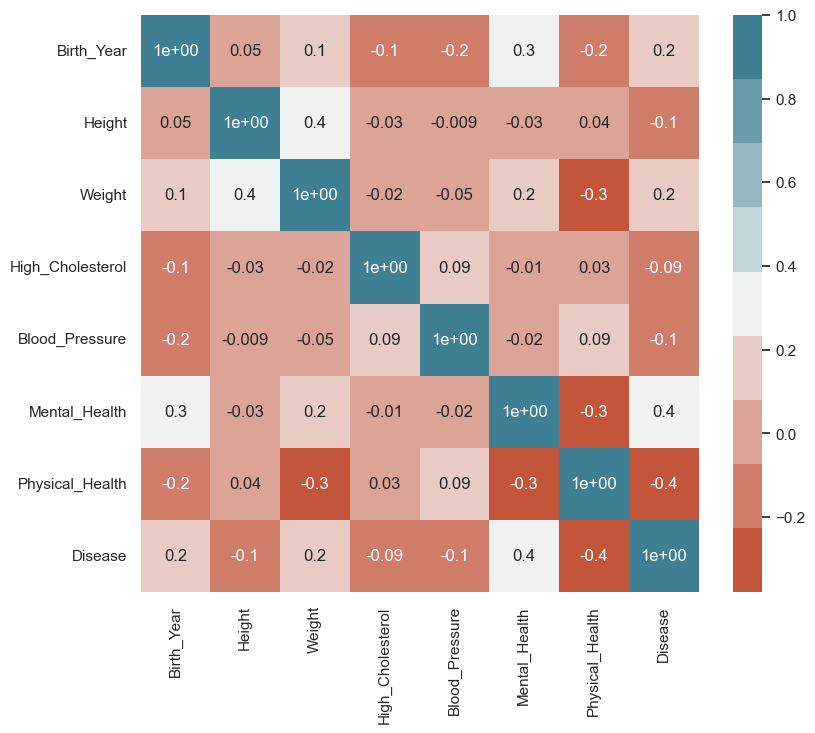

In [38]:
featuresToCorrelate = metric_features.copy()
featuresToCorrelate.append("Disease")

cor_heatmap(df[featuresToCorrelate].corr(method='kendall'))

There are no clear strong correlation between the independent variables and most of them have low correlation with the independent variable. However, after the data pre-processing these values can change.

<a class="anchor" id="title4">

# 4. Data Pre-Processing

In [39]:
df_transformed = df.copy()

<a class="anchor" id="subtitle4.1">
    
## 4.1. Filling Missing Values

Fill Education categorial variable missing values with mode.

In [40]:
df_transformed.fillna(df['Education'].mode()[0],inplace=True)

<a class="anchor" id="subtitle4.2">

## 4.2. Removing Outliers

In order to detect more accurate outliers, it's possivel to use manual and IQR methods.

<a class="anchor" id="subtitle4.2.1">

### 4.2.1. Manual Detection 

Through the visualization of the plots in [Data Exploration](#3.3-Visual-Exploration), we can identify the following thresholds:

In [41]:
filters1 = (
    (df_transformed['Birth_Year']>=1900)
    &
    (df_transformed['Blood_Pressure']<=180)
    &
    (df_transformed['High_Cholesterol']<=350)
)

df_filter1 = df_transformed[filters1]

In [42]:
print('Percentage of data kept after removing outliers:', np.round(df_filter1.shape[0] / df_transformed.shape[0], 4))

Percentage of data kept after removing outliers: 0.9588


<a class="anchor" id="subtitle4.2.2">


### 4.2.2. IQR Detection 

On a more objetive analysis, the outliers are detected using [Interquartile Range](https://www.scribbr.com/statistics/interquartile-range/).

In [43]:
q25 = df_transformed.quantile(.25)
q75 = df_transformed.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df_transformed[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0),index=df.index)

df_filter2 = df_transformed[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_filter2.shape[0] / df_transformed.shape[0], 4))

Percentage of data kept after removing outliers: 0.9225


In [44]:
#replacing limits by the disjunction.
limits = pd.concat([lower_lim,upper_lim],axis=1).rename(columns={0:'lower_lim',1:'upper_lim'})
limits.at['Birth_Year','lower_lim']=1900
limits.at['High_Cholesterol','upper_lim']=350
limits.at['Physical_Health','upper_lim']=31
limits.at['Physical_Health','lower_lim']=-1
limits.at['Mental_Health','lower_lim']=0
limits.at['Mental_Health','upper_lim']=31
limits

lower_lim  upper_lim
Birth_Year         1900.000     1993.5
Disease              -1.500        2.5
Height              145.500      189.5
Weight               29.500      105.5
High_Cholesterol    114.375      350.0
Blood_Pressure       90.000      170.0
Mental_Health         0.000       31.0
Physical_Health      -1.000       31.0

<a class="anchor" id="subtitle4.2.3">


### 4.2.3. Combination of Manual and IQR

A combination of both Manual and IQR methods provide a more robust outlier detection technique.

In [45]:
filter_both = (filters1 | filters2)
df_filter_both = df_transformed[filter_both]
print('Percentage of data kept after removing outliers:',np.round(df_filter_both.shape[0] /df_transformed.shape[0],4))

Percentage of data kept after removing outliers: 0.9662


<a class="anchor" id="subtitle4.2.4">


### 4.2.4. Replacing outliers with median

In [46]:
df_transformed_outliers_median = df_transformed.copy()
for metric in metric_features:
    for value in df_transformed_outliers_median[metric]:
        if( value > limits.at[metric,'upper_lim'] or value < limits.at[metric,'lower_lim']):
            df_transformed_outliers_median[metric].replace(value,np.median(df_transformed_outliers_median[metric]),inplace=True)

<a class="anchor" id="subtitle4.2.5">


### 4.2.5. Replacing outliers with KNN Imputer

In [47]:
imputer = KNNImputer(n_neighbors=5);

df_transformed_outliers_knn = df_transformed[metric_features].copy();
for metric in metric_features:
    for value in df_transformed_outliers_knn[metric]:
        if( value > limits.at[metric,'upper_lim'] or value < limits.at[metric,'lower_lim']):
            df_transformed_outliers_knn[metric].replace(value,np.NaN,inplace=True)
            
minmaxscaler=MinMaxScaler()
df_transformed_outliers_knn[metric_features]= minmaxscaler.fit_transform(df_transformed_outliers_knn);
df_transformed_outliers_knn=pd.DataFrame(imputer.fit_transform(df_transformed_outliers_knn),index=df_transformed.index,columns=df_transformed[metric_features].columns)
df_transformed_outliers_knn[metric_features]= minmaxscaler.inverse_transform(df_transformed_outliers_knn)
df_transformed_outliers_knn = pd.concat([df_transformed[non_metric_features],df_transformed_outliers_knn],axis=1)

Removing approximately 3.4% of data is an acceptable amount.

In [48]:
df_transformed = df_filter_both.copy() #Logistic f1 - 77.41

Transforming 3.4% of outliers with the imputations for KNNImputer.

In [49]:
df_transformed = df_transformed_outliers_knn #Logistic f1 - 77.57

Transforming 3.4% of outliers with the median.

In [50]:
df_transformed = df_transformed_outliers_median.copy() #Logistic f1 - 77.66

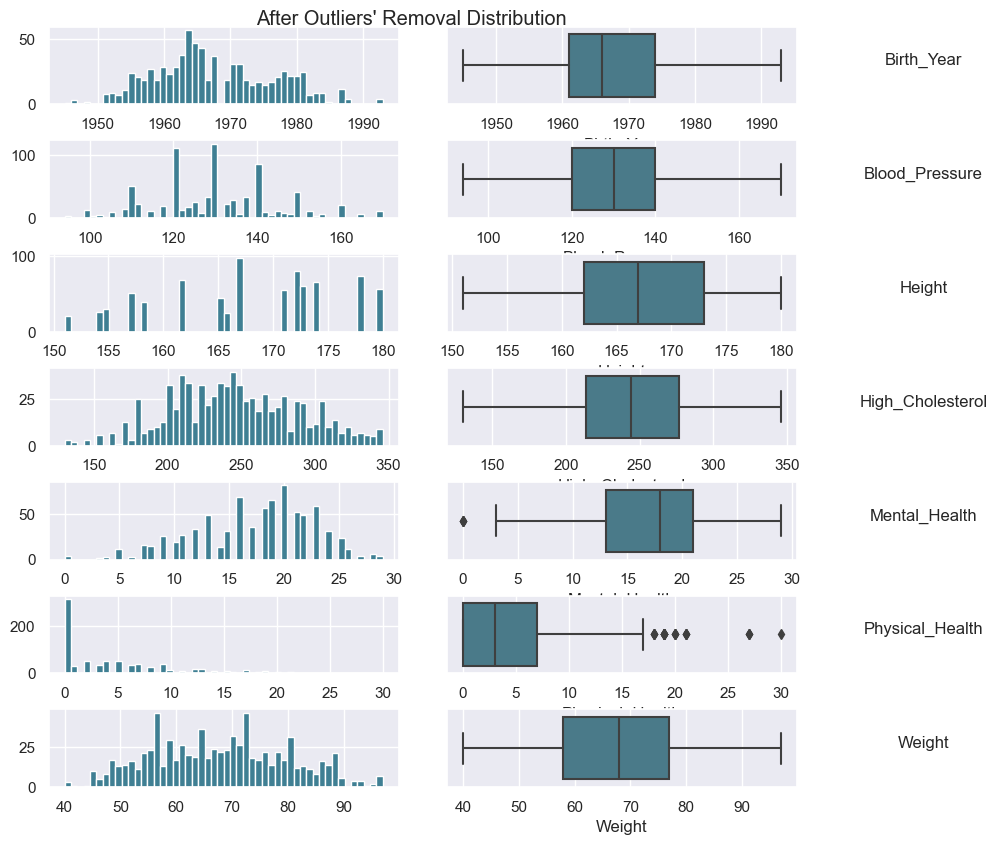

In [51]:
hist_box_maker(df_transformed[metric_features],"After Outliers' Removal Distribution",8,8)

<a class="anchor" id="subtitle4.3">


## 4.3 Feature Engineering

**Birthday to age transformation**

In [52]:
import datetime

year = datetime.date.today().year

df_transformed['Birth_Year'] = year - df_transformed['Birth_Year']
df_transformed.rename(columns={"Birth_Year": "Age"},inplace =True)

In [53]:
metric_features.remove('Birth_Year')
metric_features.append('Age')

**IMC feature extraction**

With the purpose of being in IS units, height is changed to meters.

In [54]:
df_transformed['Height']= df_transformed['Height']/100

In [55]:
df_transformed['IMC'] = df_transformed['Weight']/(df_transformed['Height']**2)

In [56]:
metric_features.append('IMC')

**Gender feature extraction**

In [57]:
df_transformed['Gender'] = df_transformed['Name'].map(lambda x: 'Male' if 'Mr.' in x else 'Female')

In [58]:
non_metric_features.append('Gender')

**Health score**

***Health Score*** feature is created summing all the ***Mental_Health_Score*** and ***Physical_Health_Score***.

In [59]:
df_transformed['Mental_Health_Score'] = df_transformed['Mental_Health'].map(lambda x: 0 if x<=15 else 1);

In [60]:
df_transformed['Physical_Health_Score'] = df_transformed['Physical_Health'].map(lambda x: 0 if x<=15 else 1);

In [61]:
df_transformed['Health_Score'] = df_transformed['Physical_Health_Score'] + df_transformed['Mental_Health_Score']
non_metric_features.append('Mental_Health_Score')
non_metric_features.append('Physical_Health_Score')
non_metric_features.append('Health_Score')

**SmokingHabit to NonSmoking**

In [62]:
df_transformed['Non_Smoking_Habit'] = df_transformed['Smoking_Habit'].map(lambda x: 0 if x=='Yes' in x else 1)
df_transformed.drop('Smoking_Habit',inplace=True,axis=1)
non_metric_features.append('Non_Smoking_Habit')
non_metric_features.remove('Smoking_Habit')

***Habit Score*** feature is created summing all the habit features

In [63]:
df_transformed['Habit_Score'] = df_transformed.loc[:,['Drinking_Habit','Fruit_Habit','Water_Habit','Exercise','Non_Smoking_Habit']].sum(axis=1);
non_metric_features.append('Habit_Score')

**Fixing incosistencies in Region feature**

In [64]:
df_transformed.replace('LONDON','London',inplace = True)

**Feature Scaling**

In [65]:
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_transformed[metric_features])
df_transformed[metric_features] = df_scaled

df_transformed.head(3)

Name       Age                    Region  \
PatientID                                                           
1167       Mrs. Stephanie Gay  0.076923                    London   
1805         Mr. Sherman Nero -0.230769                South West   
1557          Mr. Mark Boller -0.615385  Yorkshire and the Humber   

                                             Education  Disease    Height  \
PatientID                                                                   
1167       High School Incomplete (10th to 11th grade)        1 -1.090909   
1805       High School Incomplete (10th to 11th grade)        1  0.545455   
1557              Elementary School (1st to 9th grade)        1 -0.454545   

             Weight  High_Cholesterol  Blood_Pressure  Mental_Health  ...  \
PatientID                                                             ...   
1167      -0.052632          0.000000            -0.5          0.375  ...   
1805       1.052632         -0.221344             0.6         -1.125  ...   
1557       0.000000         -0.284585            -0.4          1.000  ...   

           Exercise                                      Fruit_Habit  \
PatientID                                                              
1167            Yes  Less than 1. I do not consume fruits every day.   
1805            Yes  Less than 1. I do not consume fruits every day.   
1557             No  Less than 1. I do not consume fruits every day.   

                                              Water_Habit       IMC  Gender  \
PatientID                                                                     
1167                     Between one liter and two liters  0.554874  Female   
1805                     Between one liter and two liters  0.794756    Male   
1557       More than half a liter but less than one liter  0.241914    Male   

          Mental_Health_Score Physical_Health_Score  Health_Score  \
PatientID                                                           
1167                        1                     0             1   
1805                        0                     0             0   
1557                        1                     0             1   

          Non_Smoking_Habit  Habit_Score  
PatientID                                 
1167                      1            1  
1805                      1            1  
1557                      1            1  

[3 rows x 24 columns]

In [66]:
def mappingTransform (x):
    if (x=='I never attended school / Other'
        or x== 'Neither I nor my immediate family have diabetes.' 
        or x== 'I usually consume alcohol every day'
        or x== 'Less than 1. I do not consume fruits every day.' 
        or x == 'Less than half a liter'
        or x == 'No'):
        return 0
    elif (x=='Elementary School (1st to 9th grade)' 
        or x== "I don't have diabetes, but I have direct family members who have diabetes." 
        or x== 'I consider myself a social drinker' 
        or x== '1 to 2 pieces of fruit in average' 
        or x =='More than half a liter but less than one liter'
        or x == 'Yes'): 
        return 1 
    elif (x=='High School Incomplete (10th to 11th grade)' 
        or x== 'I have/had pregnancy diabetes or borderline diabetes'
        or x=='I do not consume any type of alcohol' 
        or x== '3 to 4 pieces of fruit in average' 
        or x == 'Between one liter and two liters'):
        return 2
    elif (x == 'High School Graduate' 
        or x == '5 to 6 pieces of fruit in average' 
        or x =='I do have diabetes'): 
        return 3
    elif (x == 'More than six pieces of fruit'
          or x=='University Incomplete (1 to 2 years)'):
        return 4
    elif x == "University Complete (3 or more years)":
        return 5;

In [67]:
featuresToMap = ['Education','Diabetes','Drinking_Habit','Fruit_Habit','Water_Habit','Exercise']
df_transformed[featuresToMap] = df_transformed[featuresToMap].applymap(mappingTransform)

In [68]:
df_transformed.head()

Name       Age                    Region  Education  \
PatientID                                                                      
1167       Mrs. Stephanie Gay  0.076923                    London          2   
1805         Mr. Sherman Nero -0.230769                South West          2   
1557          Mr. Mark Boller -0.615385  Yorkshire and the Humber          1   
1658         Mr. David Caffee  0.615385                    London          5   
1544         Mr. Gerald Emery -0.153846                South East          4   

           Disease    Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                                  
1167             1 -1.090909 -0.052632          0.000000           -0.50   
1805             1  0.545455  1.052632         -0.221344            0.60   
1557             1 -0.454545  0.000000         -0.284585           -0.40   
1658             0  1.181818 -0.105263          1.090909           -0.25   
1544             1  1.181818 -0.526316          0.521739           -0.25   

           Mental_Health  ...  Exercise Fruit_Habit  Water_Habit       IMC  \
PatientID                 ...                                                
1167               0.375  ...         1           0            2  0.554874   
1805              -1.125  ...         1           0            2  0.794756   
1557               1.000  ...         0           0            1  0.241914   
1658              -0.625  ...         1           0            1 -0.635152   
1544               0.000  ...         0           1            1 -1.026031   

           Gender  Mental_Health_Score  Physical_Health_Score  Health_Score  \
PatientID                                                                     
1167       Female                    1                      0             1   
1805         Male                    0                      0             0   
1557         Male                    1                      0             1   
1658         Male                    0                      0             0   
1544         Male                    1                      0             1   

          Non_Smoking_Habit  Habit_Score  
PatientID                                 
1167                      1            1  
1805                      1            1  
1557                      1            1  
1658                      1            1  
1544                      1            1  

[5 rows x 24 columns]

<a class="anchor" id="subtitle4.4">


## 4.4. Feature Selection

<a class="anchor" id="subtitle4.4.1">


## 4.4.1 Filter Methods
</a>

- For the metric features, the **Kendall Correlation Coefficient** was the method chosen to evaluate relationship between the independent and depend variables.

- For the non metric features, **Mutual Information** and **Chi-squared** are used to evaluate relationship between the independent and depend variables.

**Metric features Filtering: Kendall Correlation Coefficient**

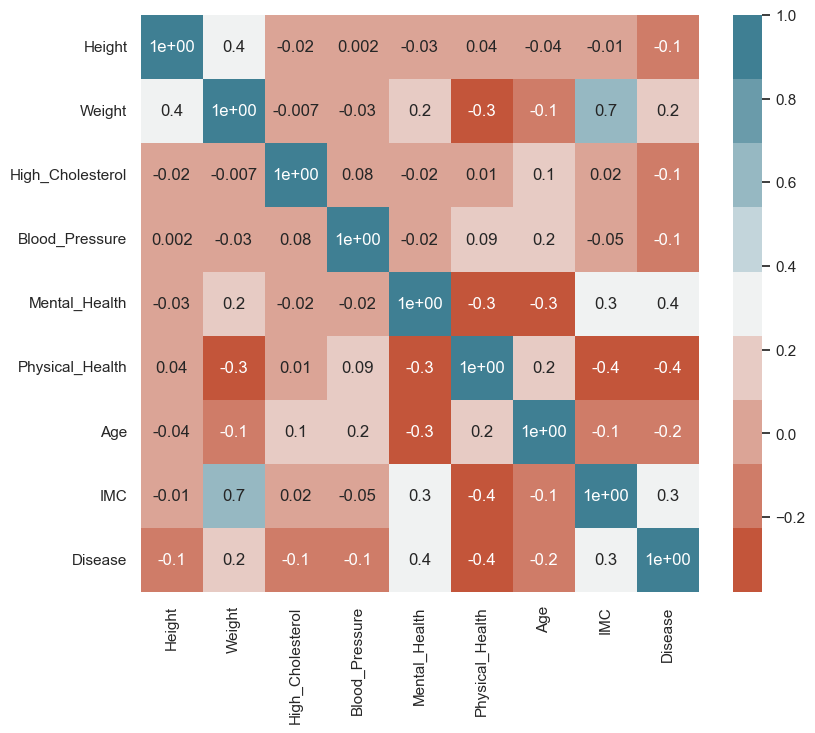

In [69]:
featuresToCorrelate = metric_features.copy()
featuresToCorrelate.append('Disease')
cor_heatmap(df_transformed[featuresToCorrelate].corr(method='kendall'))

**Non-metric features Filtering:** 

- **Mutual Information** 

In [70]:
columns=['Disease', 'Region', 'Education', 'Checkup', 'Diabetes', 'Drinking_Habit', 'Exercise', 'Fruit_Habit', 'Water_Habit', 'Gender', 'Mental_Health_Score', 'Physical_Health_Score', 'Health_Score', 'Non_Smoking_Habit', 'Habit_Score']

df_Mutual_Info= df_transformed.loc[:,columns]
# Label encoding for categoricals
for colname in df_Mutual_Info.select_dtypes("object"):
    df_Mutual_Info[colname], _ = df_Mutual_Info[colname].factorize()
discrete_features = df_Mutual_Info.dtypes == int

mi_scores = mutual_info_classif(df_Mutual_Info.drop('Disease',axis=1), df_Mutual_Info['Disease'])
mi_scores = pd.Series(mi_scores, name="MI Scores", index=df_Mutual_Info.drop('Disease',axis=1).columns)
mi_scores = mi_scores.sort_values(ascending=False)

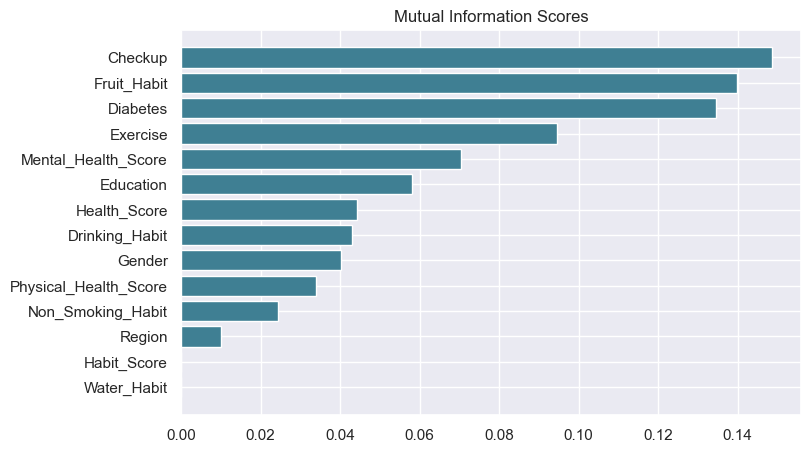

In [71]:
plot_mi_scores(mi_scores)

- **Chi-squared**

In [72]:
def TestIndependence(X,y,var,alpha=0.05):   
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result=True
    else:
        result=False
    return result

In [73]:
independenceResults =[];
for var in df_transformed[non_metric_features]:
    result=TestIndependence(df_transformed[var],df_transformed['Disease'], var)
    independenceResults.append(result)

In [74]:
dependenceDf = pd.DataFrame(
    data = independenceResults,
    index=df_transformed[non_metric_features].columns,
    columns=["Dependent with Disease?(Chi-squared)"]).sort_values(by=["Dependent with Disease?(Chi-squared)"],ascending=False)

In [75]:
dependenceDf

Dependent with Disease?(Chi-squared)
Disease                                                True
Checkup                                                True
Diabetes                                               True
Drinking_Habit                                         True
Exercise                                               True
Fruit_Habit                                            True
Gender                                                 True
Mental_Health_Score                                    True
Physical_Health_Score                                  True
Health_Score                                           True
Name                                                  False
Region                                                False
Education                                             False
Water_Habit                                           False
Non_Smoking_Habit                                     False
Habit_Score                                           False


<a class="anchor" id="subtitle4.4.2">

### 4.4.2. Wrapper Methods

**Factorizing data to apply in RFE**

In [76]:
df_Mutual_Wrapper = df_transformed.copy()
# Label encoding for categoricals
for colname in df_Mutual_Wrapper.select_dtypes("object"):
    df_Mutual_Wrapper[colname], _ = df_Mutual_Wrapper[colname].factorize()
    
X = df_Mutual_Wrapper.drop(columns=['Disease'])
y = df_Mutual_Wrapper['Disease']

**Creating Stratified K-Fold instance with 10 splits**

In [77]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

**RFE**

In [78]:
#no of features
nof_list=list(range(1,df_Mutual_Wrapper.shape[1]))
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
model = DecisionTreeClassifier(random_state = 3)
for n in nof_list:
    avg_score_test_rfe,X_train,y_train = avg_score_RFE(kf, X, y,model,n)
    score_list.append(avg_score_test_rfe)
    if(avg_score_test_rfe>high_score):
        high_score = avg_score_test_rfe
        nof = nof_list[n-1]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.987500


In [79]:
rfe = RFE(estimator = model, n_features_to_select = nof)
X_rfe = rfe.fit_transform(X_train, y_train)
selected_features = pd.Series(rfe.support_, index = X_train.columns).sort_values()
rfeDf=pd.DataFrame(selected_features,columns=['Relevant?'])

In [80]:
rfeDf

Relevant?
Name                       False
Health_Score               False
Physical_Health_Score      False
Mental_Health_Score        False
Gender                     False
IMC                        False
Water_Habit                False
Exercise                   False
Drinking_Habit             False
Non_Smoking_Habit          False
Habit_Score                False
Physical_Health            False
Mental_Health              False
Blood_Pressure             False
Weight                     False
Height                     False
Education                  False
Region                     False
Fruit_Habit                 True
High_Cholesterol            True
Age                         True
Checkup                     True
Diabetes                    True

<a class="anchor" id="subtitle4.4.3">


### 4.4.3 Embedded Methods

**Lasso Classification**

In [81]:
lasso = LassoCV()
lasso.fit(df_Mutual_Wrapper.drop('Disease',axis=1), df_Mutual_Wrapper['Disease'])
coef = pd.Series(lasso.coef_, index = df_Mutual_Wrapper.drop('Disease',axis=1).columns).sort_values()
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 11 variables


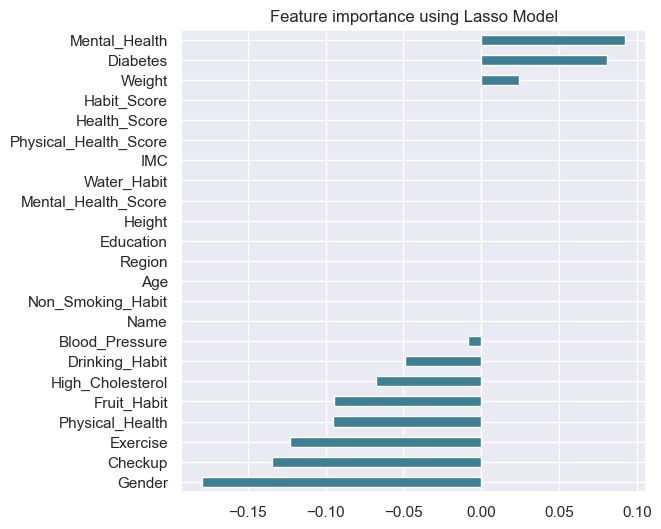

In [82]:
plot_importance(coef,'Lasso')

* * *



### Numerical Data



| Predictor | Kendall | RFE | Lasso | What to do? (One possible way to "solve") |
| --- | --- | --- | --- |--- |
| Age | Keep | Keep | Discard | Try with and without |
| Blood_Pressure | Discard | Discard |Keep  | Try with and without |
| Height | Discard | Discard | Discard| Discard |
| High_Cholesterol | Discard | Keep | Keep | Try with and without |
| IMC | Keep | Discard | Discard | Try with and without |
| Mental_Health | Keep | Discard | Keep |  Try with and without |
| Physical_Health | Keep | Discard | Keep |  Try with and withou |
| Weight | Keep | Discard | Keep |  Try with and without |



* * *




### Categorical Data



| Predictor | Mutual Information | Chi-Square | RFE | Lasso | What to do? (One possible way to "solve") |
| --- | --- | --- | --- | --- | --- |
| Checkup | Keep | Keep | Keep | Keep |  Include in the model |
| Diabetes | Keep | Keep | Keep | Keep |  Include in the model |  
| Drinking_Habit | Discard| Keep | Discard | Keep | Try with and withou |
| Education | Discard | Discard | Discard | Discard | Discard |
| Habit_Score | Discard | Discard | Discard | Discard  | Discard  |
| Exercise | Keep | Keep | Discard | Keep | Try with and without |  
| Fruit_Habit | Keep | Keep | Keep | Keep |  Include in the model |
| Gender | Discard | Keep | Discard | Keep | Try with and without  |
| Health_Score | Keep | Keep | Discard | Discard | Try with and without |
| Mental_Health_Score | Keep | Keep | Discard | Discard  | Try with and without |
| Name | NaN | NaN | Discard | Keep |  Discard |
| Non_Smoking_Habit | Discard | Discard | Discard | Discard | Discard |
| Physical_Health_Score | Keep | Keep | Discard | Discard | Try with and without |
| Region | Discard | Discard | Discard | Discard |  Discard |
| Water_Habit | Discard | Discard | Discard | Discard  | Discard |



* * *

**The next 4 code cells are repeated with the different features and the score is compared using the DecisionTreeClassifier.**

In [83]:
#METRIC FEATURES TESTING
#85.56 - 83.78
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit']
#95.97-92.74
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age']
#1-99.26
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure']
#1-99.02
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','High_Cholesterol']
#1-93.46
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','IMC']
#1-98.52
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','Mental_Health']
#1-98.88
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','Physical_Health']
#1-92.84
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','Weight']

#CATEGORICAL FEATURES TESTING
#1-99.14
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','Drinking_Habit']
#1-98.91
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','Exercise']
#1-98.52
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','Health_Score']
#1-98.77
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','Mental_Health_Score']
#1-99.38
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','Physical_Health_Score']
#1-99.13
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','Physical_Health_Score','Gender']

#FINAL FEATURES
#1-99.38 - kaggle - 98.901
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','Physical_Health_Score']
#1-99.13 - kaggle - 100
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','High_Cholesterol','Physical_Health_Score','Gender']
#1-99.13 - kaggle - 97.82
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Blood_Pressure','Physical_Health_Score','Gender']
#1-99.14 - kaggle - 100
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age',\
                   'Blood_Pressure','Physical_Health_Score','High_Cholesterol']

#1-99.27 - kaggle - 100
features_selected=['Disease','Checkup','Diabetes','Fruit_Habit','Age','Physical_Health_Score','High_Cholesterol']

df_transformed_selection = df_transformed[features_selected].copy()

**The selected features are:**
- Physical_Health_Score; 
- High_Cholesterol; 
- Age; 
- Checkup;
- Diabetes;
- Fruit_Habit;

**The target variable is:**
- Disease

<a class="anchor" id="subtitle4.5">


## 4.5 Encoding nominal features
    
</a>

Since models do not accept nominal variables, **Gender** are encoded by **One Hot** format.

In [84]:
oneHotEncoder = OneHotEncoder(sparse=False, drop="first")
oh_feat = oneHotEncoder.fit_transform(df_transformed_selection[['Checkup']])
oh_feat_names = oneHotEncoder.get_feature_names_out()
oh_df = pd.DataFrame(oh_feat, index=df_transformed_selection.index, columns=oh_feat_names)

df_transformed_selection = pd.concat([df_transformed_selection.drop(columns=['Checkup']), oh_df], axis=1)
df_transformed_selection.head()

Disease  Diabetes  Fruit_Habit       Age  Physical_Health_Score  \
PatientID                                                                    
1167             1         0            0  0.076923                      0   
1805             1         0            0 -0.230769                      0   
1557             1         0            0 -0.615385                      0   
1658             0         2            0  0.615385                      0   
1544             1         2            1 -0.153846                      0   

           High_Cholesterol  Checkup_Less than three months  \
PatientID                                                     
1167               0.000000                             0.0   
1805              -0.221344                             0.0   
1557              -0.284585                             0.0   
1658               1.090909                             0.0   
1544               0.521739                             0.0   

           Checkup_More than 3 years  Checkup_Not sure  
PatientID                                               
1167                             1.0               0.0  
1805                             0.0               1.0  
1557                             1.0               0.0  
1658                             0.0               1.0  
1544                             1.0               0.0

X and y are separated from the dataset

In [85]:
X = df_transformed_selection.drop(columns=['Disease'])
y = df_transformed_selection['Disease']

**Kfolds** is applied to the **DecisionTreeClassifier**, in order to present a average value of the accuracy, using all the dataset as training and validation

In [86]:
avg_score(kf, X, y,DecisionTreeClassifier(random_state=41))

(1.0, 0.9927)

### Final dataset is copied to the original one

In [87]:
df_transformed = df_transformed_selection.copy()

In [88]:
df = df_transformed.copy()

<a class="anchor" id="title5">


# 5. Data partition

In [89]:
X = df.drop(columns=['Disease'])
y = df['Disease']

<a class="anchor" id="title6">


# 6. Modelling

<a class="anchor" id="subtitle6.1">


## 6.1. Default-parameterized models
    
</a>

Applying the models with the default parameters in order to choose the models to hypertune

In [90]:
default_Models={
    'lr' : LogisticRegression(random_state=41),
    'knn': KNeighborsClassifier(),
    'mlp': MLPClassifier(random_state=41),
    'svc': SVC(random_state=41),
    'dt': DecisionTreeClassifier(random_state=41),
    'rn': RadiusNeighborsClassifier(radius=3.4),
    'gpc': GaussianProcessClassifier(random_state=41)   
}
training_scores=[];
validation_scores=[];
for each,model in default_Models.items():
    train_score, validation_score = avg_score(kf, X, y, model)
    training_scores.append(train_score)
    validation_scores.append(validation_score)

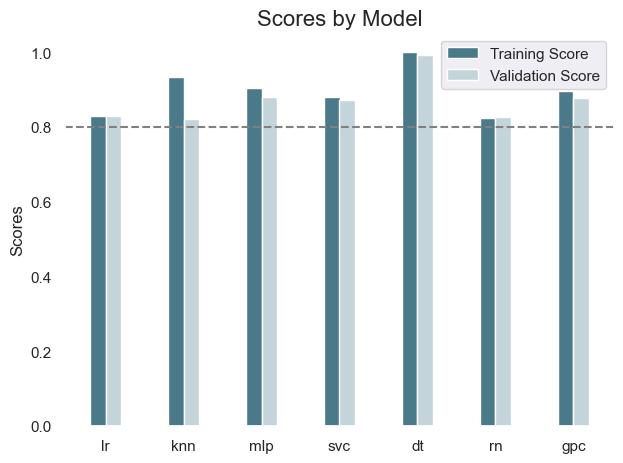

In [91]:
plot_scores(default_Models.keys(),training_scores,validation_scores)

<a class="anchor" id="subtitle6.2">


## 6.2. Optimitizing Best Models
    
</a>

Applying GridSearch in top four models: **DecisionTree, GaussianProcess, Support Vector** and **Radius-Nearest Neighbors**.

### Decision Tree Model

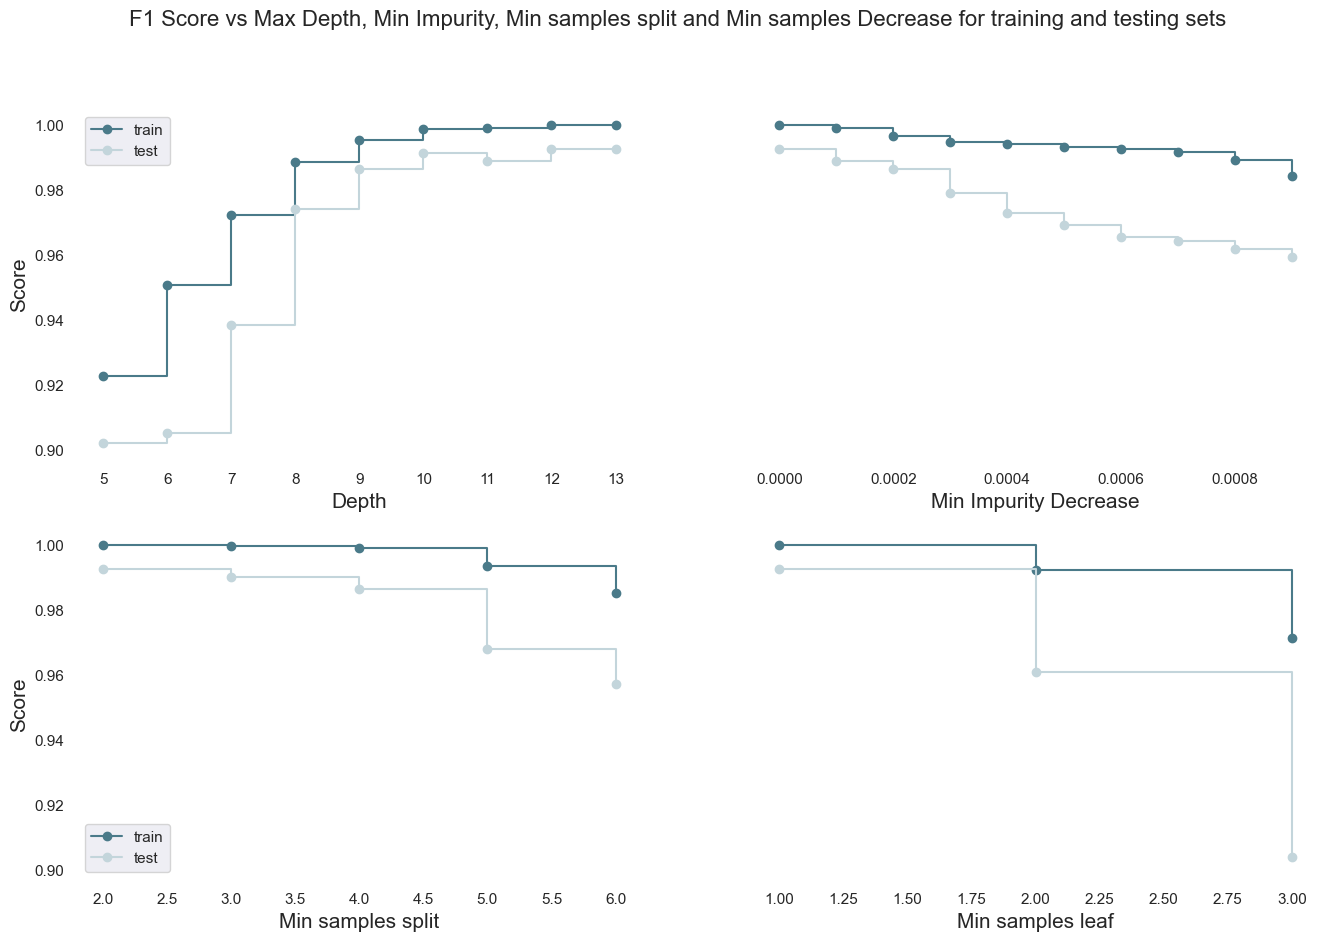

In [92]:
#MAX DEPTH
train_scores_depth = []
test_scores_depth =[]
depths_range=range(5,14)
for depth in depths_range:
    train_score,test_score= avg_score(kf, X, y,DecisionTreeClassifier(random_state=41,max_depth=depth))
    train_scores_depth.append(train_score)
    test_scores_depth.append(test_score)

#Min_impurity_decrease
train_scores_impurity = []
test_scores_impurity =[]
min_impurity_range=np.arange (0, 0.001, 0.0001)
for imp in min_impurity_range:
    train_score,test_score= avg_score(kf, X, y,DecisionTreeClassifier(random_state=41,min_impurity_decrease=imp))
    train_scores_impurity.append(train_score)
    test_scores_impurity.append(test_score)

#Min_samples_split
train_scores_samples = []
test_scores_samples =[]
samples_range=range(2,7)
for samples in samples_range:
    train_score,test_score= avg_score(kf, X, y,DecisionTreeClassifier(random_state=41,min_samples_split=samples))
    train_scores_samples.append(train_score)
    test_scores_samples.append(test_score)
    
train_scores_leaf = []
test_scores_leaf =[]
leaf_range=range(1,4)
for leaf in leaf_range:
    train_score,test_score= avg_score(kf, X, y,DecisionTreeClassifier(random_state=41,min_samples_leaf=leaf))
    train_scores_leaf.append(train_score)
    test_scores_leaf.append(test_score)

    
sns.set()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)
fig.set_size_inches(16, 10)
fig.suptitle('F1 Score vs Max Depth, Min Impurity, Min samples split and Min samples Decrease for training and testing sets', fontsize=16)

ax1.set_facecolor("white")
ax1.set_xlabel("Depth", fontsize=15)
ax1.set_ylabel("Score", fontsize=15)
ax1.plot(depths_range, train_scores_depth, marker='o', label="train", drawstyle="steps-post",color="#4A7A89")
ax1.plot(depths_range, test_scores_depth, marker='o', label="test", drawstyle="steps-post",color="#c3d5db")
ax1.grid(visible=False)
ax1.legend()

ax2.set_facecolor("white")
ax2.set_xlabel("Min Impurity Decrease", fontsize=15)
ax2.plot(min_impurity_range, train_scores_impurity, marker='o', label="train", drawstyle="steps-post",color="#4A7A89")
ax2.plot(min_impurity_range, test_scores_impurity, marker='o', label="test", drawstyle="steps-post",color="#c3d5db")
ax2.grid(visible=False)

ax3.set_facecolor("white")
ax3.set_xlabel("Min samples split", fontsize=15)
ax3.set_ylabel("Score", fontsize=15)
ax3.plot(samples_range, train_scores_samples, marker='o', label="train", drawstyle="steps-post",color="#4A7A89")
ax3.plot(samples_range, test_scores_samples, marker='o', label="test", drawstyle="steps-post",color="#c3d5db")
ax3.grid(visible=False)
ax3.legend()

ax4.set_facecolor("white")
ax4.set_xlabel("Min samples leaf", fontsize=15)
ax4.plot(leaf_range, train_scores_leaf, marker='o', label="train", drawstyle="steps-post",color="#4A7A89")
ax4.plot(leaf_range, test_scores_leaf, marker='o', label="test", drawstyle="steps-post",color="#c3d5db")
ax4.grid(visible=False)

plt.show()

In [93]:
param_grid = {
    'criterion':['gini','entropy','log_loss'],
    'min_samples_split': range(2,7),
    'min_samples_leaf':range(1,4),
    'max_features':["auto", "sqrt", "log2"],
    'min_impurity_decrease': np.arange (0, 0.001, 0.0001)
    
}
gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state=41,splitter='best',max_depth=10),
                  param_grid=param_grid,cv=10,
                  scoring=['accuracy','f1'], refit ='f1',
                  verbose=1, n_jobs=-1,return_train_score=True)
gs.fit(X,y)
print('\nParameters:',gs.best_params_)
print('F1 Score:',gs.best_score_)

Fitting 10 folds for each of 1350 candidates, totalling 13500 fits

Parameters: {'criterion': 'gini', 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3}
F1 Score: 0.9661698169823646


In [94]:
best_dt= DecisionTreeClassifier(random_state=41,criterion='gini', max_features='log2', min_impurity_decrease=  0.0,\
                                               min_samples_leaf=1, max_depth=10, min_samples_split=2)

### GaussianProcess

In [95]:
param_grid = {
    'kernel' : [1*RBF(), 1*DotProduct(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()]    
}

gs = GridSearchCV(estimator = GaussianProcessClassifier(random_state=41),
                  param_grid=param_grid,cv=10,
                  scoring=['accuracy','f1'], refit ='f1',
                  verbose=1, n_jobs=-1,return_train_score=True)
gs.fit(X,y)
print('\nParameters:',gs.best_params_)
print('F1 Score:',gs.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits

Parameters: {'kernel': 1**2 * RationalQuadratic(alpha=1, length_scale=1)}
F1 Score: 0.985454720066677


In [96]:
best_gp= GaussianProcessClassifier(random_state=41,kernel=1*RationalQuadratic())

### Support Vector Machine

**Using GridSearchCV**

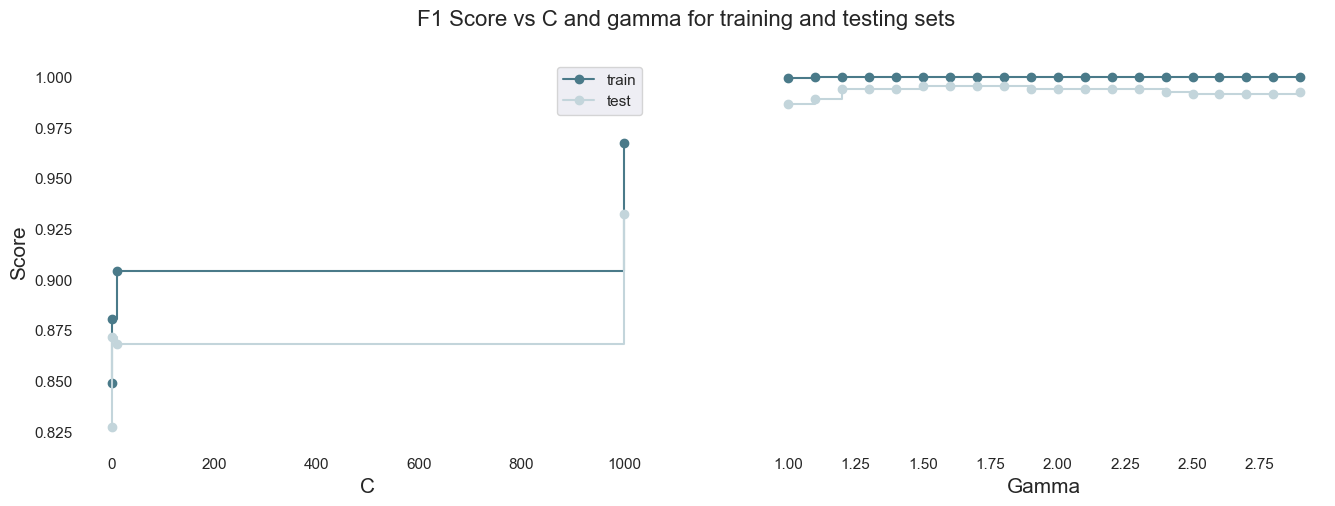

In [97]:
#C
train_scores_c = []
test_scores_c =[]
c_range=[0.1,1.0,10,1000]
for c in c_range:
    train_score,test_score= avg_score(kf, X, y,SVC(random_state=41,C=c))
    train_scores_c.append(train_score)
    test_scores_c.append(test_score)

#Gamma
train_scores_gamma = []
test_scores_gamma =[]
gamma_range= np.arange(1,3,0.1)
for gamma in gamma_range:
    train_score,test_score= avg_score(kf, X, y,SVC(random_state=41,gamma=gamma,C=1000))
    train_scores_gamma.append(train_score)
    test_scores_gamma.append(test_score)
    
sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(16, 5)
fig.suptitle('F1 Score vs C and gamma for training and testing sets', fontsize=16)

ax1.set_facecolor("white")
ax1.set_xlabel("C", fontsize=15)
ax1.set_ylabel("Score", fontsize=15)
ax1.plot(c_range, train_scores_c, marker='o', label="train", drawstyle="steps-post",color="#4A7A89")
ax1.plot(c_range, test_scores_c, marker='o', label="test", drawstyle="steps-post",color="#c3d5db")
ax1.grid(visible=False)
ax1.legend()

ax2.set_facecolor("white")
ax2.set_xlabel("Gamma", fontsize=15)
ax2.plot(gamma_range, train_scores_gamma, marker='o', label="train", drawstyle="steps-post",color="#4A7A89")
ax2.plot(gamma_range, test_scores_gamma, marker='o', label="test", drawstyle="steps-post",color="#c3d5db")
ax2.grid(visible=False)

In [100]:
param_grid = \
    {
        'C':[100,1000],
        'kernel' : ['rbf', 'sigmoid'],
        'gamma': np.arange(1,2,0.1),
        'shrinking' : [True,False],
        'probability': [True,False],
        'class_weight': [None,'balanced'],
        'decision_function_shape': ['ovo','ovr'],
        'break_ties': [True,False] 
    }

gs = GridSearchCV(estimator = SVC(random_state=41),
                  param_grid=param_grid,cv=3,
                  scoring=['accuracy','f1'], refit ='f1',
                  verbose=1, n_jobs=-1)
gs.fit(X,y)
print('\nParameters:',gs.best_params_)
print('F1 Score:',gs.best_score_)

Fitting 3 folds for each of 6400 candidates, totalling 19200 fits
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.0,

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, 

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.80000

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.20000

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, 

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.20000

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.400000

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degre

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.70

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.900

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=Tr

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gam

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.40000000

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.70

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4,

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.20000

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.400

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.70000

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.900000

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=rbf, probability=True, shrinkin

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_sh

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, d

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, 

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_sh

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=rbf, probability=True, sh

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_sha

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, 

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shap

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2,

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=Fa

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3,

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.558) f1: (test=0.576) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.558) f1: (test=0.576) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shap

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3,

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_sha

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.940) f1: (test=0.941) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.940) f1: (test=0.941) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=False, shrinking=True; 

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.602) f1: (test=0.607) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.598) f1: (test=0.608) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shap

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_sh

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape

[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.940) f1: (test=0.941) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=True, shrinking=False; ac

[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.607) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.602) f1: (test=0.607) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=Fa

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.598) f1: (test=0.608) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shap

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5,

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shap

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5,

[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=None, decision_function_shap

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=True, sh

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degr

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_functio

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, 

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_functio

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, deg

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, d

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_s

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degre

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, deg

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_functi

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degre

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probabilit

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, deg

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degre

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, deg

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_functio

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, deg

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.940) f1: (test=0.940) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=Fa

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=si

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_f

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, de

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, d

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probabi

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.610) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, d

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_functio

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, 

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_functio

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True,

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, d

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, 

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_functi

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.603) f1: (test=0.616) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sig

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, dec

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_functio

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, 

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.603) f1: (test=0.616) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=sigm

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_functio

[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balance

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, dec

[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_

[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=True, class_weight=balanced, 

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.940) f1: (test=0.941) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.940) f1: (test=0.941) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, deg

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.598) f1: (test=0.608) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.598) f1: (test=0.608) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_functio

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, de

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_func

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=o

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.0, ker

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.607) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=sigmoid, probabili

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.598) f1: (test=0.608) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, deg

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_functi

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, de

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_functi

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.607) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=sigmoid, probability=

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degr

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.578) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_functi

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, de

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_fun

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo,

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.953) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probability=True, shrinking=Fals

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_functi

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=o

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, deg

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_functi

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, d

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shr

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, deg

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.558) f1: (test=0.576) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.558) f1: (test=0.576) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_functi

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, de

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_fun

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=sigmoid, probability=

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, de

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degre

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.558) f1: (test=0.576) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_functi

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, de

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_funct

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, de

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.598) f1: (test=0.608) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.598) f1: (test=0.608) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_functi

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, d

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_fun

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.940) f1: (test=0.941) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=rbf, probability=True, shrinking=Fal

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.607) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.602) f1: (test=0.607) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=sigmoid, probabili

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degr

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, de

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_functi

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.607) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, de

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.578) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_functi

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, d

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape

[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.953) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.953) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=False, shrinking=T

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_fun

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.562) f1: (test=0.578) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.578) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degr

[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function

[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=None, decision_function_shape=ovr, deg

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.603) f1: (test=0.616) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.0, kerne

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balance

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_fun

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balan

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_fu

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balan

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.940) f1: (test=0.940) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.0, kernel=rbf, probabil

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_funct

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanc

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_fun

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balan

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_fu

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balan

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probabil

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.610) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balan

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_fu

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=bal

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decis

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probabi

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanc

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_fu

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balan

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_f

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=bal

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.940) f1: (test=0.940) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid,

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_funct

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanc

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_fu

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balan

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, dec

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.940) f1: (test=0.940) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.1, kerne

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_fu

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.588) f1: (test=0.610) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=ba

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_funct

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=rbf, probabilit

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balan

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.610) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, d

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_func

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balance

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_func

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.603) f1: (test=0.616) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.0, kernel

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_f

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.970) f1: (test=0.971) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_funct

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balance

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.940) f1: (test=0.940) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.954) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.948) f1: (test=0.949) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.1, kerne

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_func

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanc

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_fu

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balan

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=s

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.955) f1: (test=0.957) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.951) f1: (test=0.952) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_fun

[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.588) f1: (test=0.610) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balan

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.955) f1: (test=0.956) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decis

[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_funct

[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=100, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=100, break_ties=False, class_weight=balance

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: 

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, 

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degr

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, de

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degr

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: 

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, 

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degr

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, de

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinkin

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degr

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, d

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degre

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probability=True, shrinking=Tru

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, deg

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, 

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, deg

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=4, gamma=

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (te

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, de

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degr

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, d

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovo, degre

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.977) f1: (test=0.978) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.1, kernel=rbf, probability=False, shrinking=

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_functi

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, 

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.558) f1: (test=0.576) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_fun

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr,

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, deg

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=sigmoid, probabili

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, deg

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.558) f1: (test=0.576) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_functi

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, de

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_func

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.974) f1: (test=0.975) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=True, s

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.989) f1: (test=0.989) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, de

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.598) f1: (test=0.608) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_functi

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, de

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_functi

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, de

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_functi

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.607) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, de

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.562) f1: (test=0.578) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.562) f1: (test=0.578) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_func

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degr

[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.977) f1: (test=0.978) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=False, shrinking=

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.578) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_functio

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, de

[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_functi

[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=None, decision_function_

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=rbf, probability=False, shrink

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_s

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_func

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, 

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_fun

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=o

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_fu

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo,

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_fu

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_s

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probability=False, shrink

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_s

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_funct

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo,

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_fu

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, proba

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_fun

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_fu

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=o

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, 

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probab

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_f

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_funct

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, 

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_fun

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.974) f1: (test=0.975) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probabil

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.989) f1: (test=0.989) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_func

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balan

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_fu

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=ba

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.974) f1: (test=0.975) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=rbf, probability

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kerne

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decis

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_func

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balance

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_funct

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balance

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.977) f1: (test=0.978) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.977) f1: (test=0.978) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probabilit

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balan

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_f

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.648) f1: (test=0.676) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=ba

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balance

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_func

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.603) f1: (test=0.616) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.989) f1: (test=0.989) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_f

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.648) f1: (test=0.676) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_funct

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balance

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.974) f1: (test=0.975) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kerne

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_fu

[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_funct

[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balance

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_fun

[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=1000, break_ties=True, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=True, class_weight=balanc

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.607) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probabi

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ov

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, 

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_fu

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ov

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.977) f1: (test=0.978) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.977) f1: (test=0.978) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=False, shrin

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.562) f1: (test=0.578) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.578) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_fun

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ov

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.1, kernel=rbf, probabilit

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ov

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.558) f1: (test=0.576) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decisio

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_func

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ov

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=rbf, probabilit

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=o

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_func

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, 

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.0, kernel=sigmoid, prob

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_func

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.558) f1: (test=0.576) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.558) f1: (test=0.576) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ov

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovo, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.974) f1: (test=0.975) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.974) f1: (test=0.975) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=rbf, probability=False, shrin

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.989) f1: (test=0.989) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, 

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.598) f1: (test=0.608) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_func

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.562) f1: (test=0.581) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ov

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.607) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.655) f1: (test=0.662) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probabi

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ov

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.562) f1: (test=0.578) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_sh

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, 

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.554) f1: (test=0.567) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_func

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.977) f1: (test=0.978) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.1, kernel=rbf, probability=False, shrin

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decisio

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.562) f1: (test=0.578) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_func

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr,

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.588) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_fun

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=3, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr,

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.667) f1: (test=0.669) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.588) f1: (test=0.601) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=sigmoid, prob

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.989) f1: (test=0.989) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.625) f1: (test=0.640) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.569) f1: (test=0.579) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.558) f1: (test=0.576) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.602) f1: (test=0.616) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.622) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.7000000000000006, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ov

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.974) f1: (test=0.975) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.959) f1: (test=0.959) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.0, kernel=rbf, probability=False, shr

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.989) f1: (test=0.989) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.989) f1: (test=0.989) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr

[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.598) f1: (test=0.608) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.629) f1: (test=0.643) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.581) f1: (test=0.600) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_f

[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=o

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.583) f1: (test=0.590) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=

[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.631) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=None, decision_function_shape=ovr, degree=5, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.583) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=None, decision_functio

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.974) f1: (test=0.975) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.0, kernel=rbf, probabi

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.1, 

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decisi

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weigh

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=ba

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decisio

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=b

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.977) f1: (test=0.978) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.1, kernel=rbf, prob

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=ba

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=bal

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=bal

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.603) f1: (test=0.616) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.0, k

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.989) f1: (test=0.989) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decisi

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, dec

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, deci

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanc

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.974) f1: (test=0.975) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.0, kernel=rbf, probabi

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.1, 

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, dec

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=ba

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, dec

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=ba

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.977) f1: (test=0.978) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.977) f1: (test=0.978) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.1, kernel=rbf, proba

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, 

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=bal

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovo, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.603) f1: (test=0.616) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.0, k

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.989) f1: (test=0.989) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.2000000000000002, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decisi

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.586) f1: (test=0.596) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.3000000000000003, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.5000000000000004, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decisi

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.6000000000000005, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.8000000000000007, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, dec

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=1, gamma=1.9000000000000008, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weigh

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.1, ker

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.3000000000000003, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decisio

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.6000000000000005, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decisi

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.7000000000000006, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=2, gamma=1.9000000000000008, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decisi

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.603) f1: (test=0.616) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.0, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.2000000000000002, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=bal

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.4000000000000004, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.648) f1: (test=0.676) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.625) f1: (test=0.638) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.5000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.648) f1: (test=0.676) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=ba

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.7000000000000006, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decisio

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.551) f1: (test=0.562) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=3, gamma=1.8000000000000007, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=b

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.974) f1: (test=0.975) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.959) f1: (test=0.961) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.0, kernel=rbf, probab

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.605) f1: (test=0.618) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.670) f1: (test=0.672) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.1, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.1, 

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.3000000000000003, kernel=rbf, probability=False, shrinking=False; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decis

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.4000000000000004, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.5000000000000004, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.966) f1: (test=0.967) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.618) f1: (test=0.630) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.6000000000000005, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.652) f1: (test=0.680) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=ba

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.8000000000000007, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decisio

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.547) f1: (test=0.557) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=4, gamma=1.9000000000000008, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.571) f1: (test=0.571) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=b

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.977) f1: (test=0.978) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.964) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, probability=False, shrinking=True; accuracy: (test=0.963) f1: (test=0.963) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.1, kernel=rbf, prob

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=True; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.655) f1: (test=0.657) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.577) f1: (test=0.586) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.2000000000000002, kernel=sigmoid, probability=False, shrinking=False; accuracy: (test=0.594) f1: (test=0.606) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weig

[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.584) f1: (test=0.608) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.579) f1: (test=0.585) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.4000000000000004, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.633) f1: (test=0.642) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=bal

[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.6000000000000005, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=True; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.614) f1: (test=0.628) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.588) f1: (test=0.607) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.7000000000000006, kernel=sigmoid, probability=True, shrinking=False; accuracy: (test=0.575) f1: (test=0.580) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=b

[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=True; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.966) f1: (test=0.968) total time=   0.0s
[CV 2/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.978) f1: (test=0.978) total time=   0.0s
[CV 3/3] END C=1000, break_ties=False, class_weight=balanced, decision_function_shape=ovr, degree=5, gamma=1.9000000000000008, kernel=rbf, probability=True, shrinking=False; accuracy: (test=0.981) f1: (test=0.982) total time=   0.0s
[CV 1/3] END C=1000, break_ties=False, class_weight=balanced, decisio

In [101]:
best_svc= SVC(random_state=41,C=1000,kernel ='rbf',gamma=1.7)

In [102]:
avg_score(kf, X, y,best_svc)

(1.0, 0.9952)

### Radius-Nearest Neighbors

In [103]:
param_grid = \
[
    {
        'radius':np.arange(1.3,3,0.1),
        'weights' : ['uniform','distance'],
        'algorithm' : ['ball_tree', 'kd_tree'],
        'metric': ['euclidean','manhattan'],
        'leaf_size' : np.arange(10,100,10)
    },
]
gs = GridSearchCV(estimator = RadiusNeighborsClassifier(n_jobs=-1),
                  param_grid=param_grid,cv=10,
                  scoring=['accuracy','f1'], refit ='f1',
                  verbose=1, n_jobs=-1)
gs.fit(X,y)
print('\nParameters:',gs.best_params_)
print('F1 Score:',gs.best_score_)

Fitting 10 folds for each of 1224 candidates, totalling 12240 fits

Parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'manhattan', 'radius': 2.000000000000001, 'weights': 'distance'}
F1 Score: 0.9927657689581857


In [104]:
best_rn= RadiusNeighborsClassifier(radius=5,weights='distance',\
                                             metric='manhattan',leaf_size=10,algorithm='ball_tree')

<a class="anchor" id="subtitle6.3">


## 6.3. Ensemble Learning Methods
    
</a>

GradientBoostingClassifier, BaggingClassifier,AdaBoostClassifier,StackingClassifier

**Bagging**

In [105]:
dt= DecisionTreeClassifier(random_state=41)
  
baggingclassifier= BaggingClassifier(n_estimators=100,base_estimator=dt);
print(avg_score(kf, X, y,baggingclassifier))

(1.0, 0.9939)


**Boosting**

In [106]:
dt= DecisionTreeClassifier(random_state=41,max_depth=8)
boostingclassifier = AdaBoostClassifier(base_estimator = dt, random_state = 15) 
print(avg_score(kf, X, y,boostingclassifier))

(1.0, 0.9939)


**Stacking**

In [107]:
estimators = [
    ('svc',SVC(random_state=41,C=1000,kernel ='rbf',gamma=1.7)),
    ('rnc',RadiusNeighborsClassifier(random_state=41,radius=2,weights='distance'))]
stackingclassifier = StackingClassifier(estimators=estimators)
print(avg_score(kf, X, y,stackingclassifier))

(1.0, 0.9976)


<a class="anchor" id="title7">


# 7. Model Assessment
    
</a>

In [108]:
train_scores_overall=[]
val_scores_overall=[]
best_models= dict();

In [109]:
best_models['DecisionTree'] = best_dt
train_score, val_score= avg_score(kf, X, y,best_models['DecisionTree'])
train_scores_overall.append(train_score)
val_scores_overall.append(val_score)

In [110]:
best_models['GaussianProcess'] = best_gp 
train_score, val_score= avg_score(kf, X, y,best_models['GaussianProcess'])
train_scores_overall.append(train_score)
val_scores_overall.append(val_score)

In [111]:
best_models['SupportVectorMachine'] = best_svc
train_score, val_score= avg_score(kf, X, y,best_models['SupportVectorMachine'])
train_scores_overall.append(train_score)
val_scores_overall.append(val_score)

In [112]:
best_models['RadiusNeighbors'] = best_rn
train_score, val_score= avg_score(kf, X, y,best_models['RadiusNeighbors'])
train_scores_overall.append(train_score)
val_scores_overall.append(val_score)

In [113]:
dt= DecisionTreeClassifier(random_state=41)
best_models['BaggingDecisionTree'] = baggingclassifier;
train_score, val_score= avg_score(kf, X, y,best_models['BaggingDecisionTree'])
train_scores_overall.append(train_score)
val_scores_overall.append(val_score)

In [114]:
best_models['BoostingDecisionTree'] = boostingclassifier
train_score, val_score= avg_score(kf, X, y,best_models['BoostingDecisionTree'])
train_scores_overall.append(train_score)
val_scores_overall.append(val_score)

In [115]:
best_models['StackingSVC_RNC'] = stackingclassifier
train_score, val_score= avg_score(kf, X, y,best_models['StackingSVC_RNC'])
train_scores_overall.append(train_score)
val_scores_overall.append(val_score)

**Barplot with the F1 scores of each model**

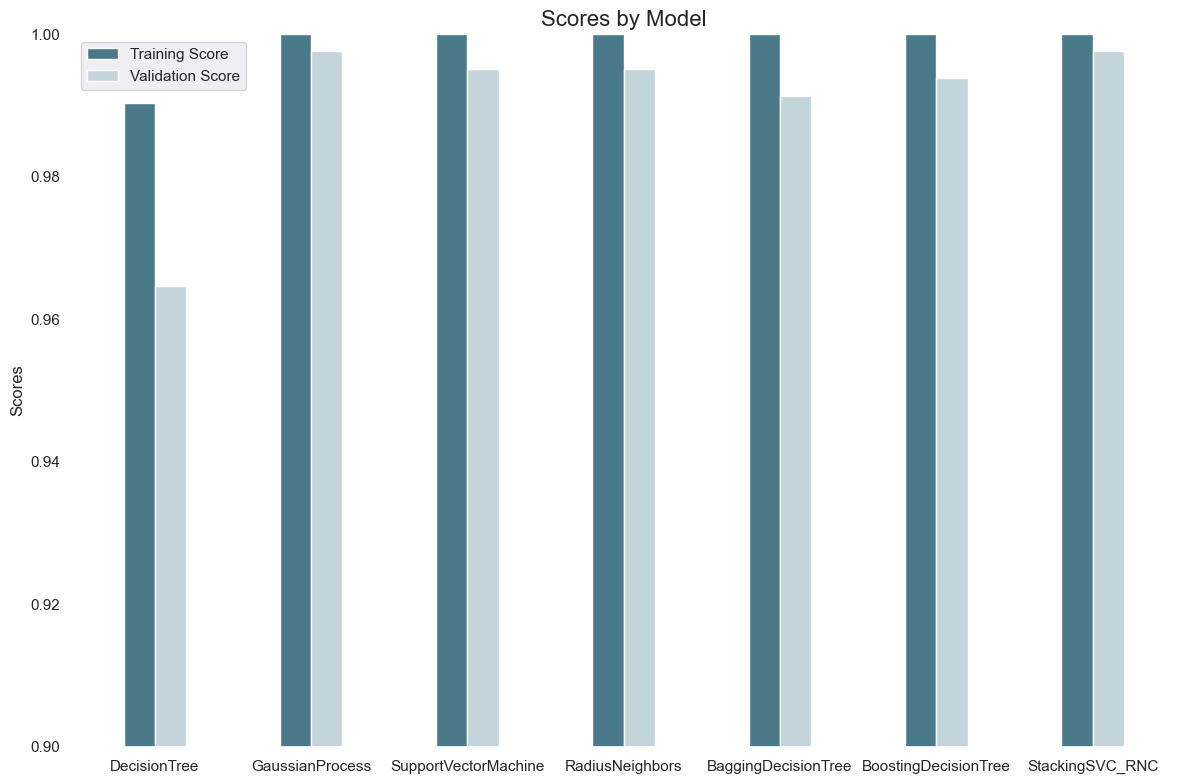

In [116]:
sns.set()
x = np.arange(len(train_scores_overall))  # the label locations
width = 0.20  # the width of the bars
##cf7c68
plt.figure(1, figsize = (12,8))

ax = plt.axes()
ax.set_facecolor("white")
plt.axhline(y=0.8,linestyle='dashed',color='grey')

plt.bar(x - width/2, train_scores_overall, width, label='Training Score',color="#4A7A89")
plt.bar(x + width/2, val_scores_overall, width, label='Validation Score',color="#c3d5db")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Scores')
plt.title('Scores by Model',fontsize=16)
plt.xticks(x, best_models.keys())
plt.ylim(0.9,1)
plt.legend()
plt.grid(visible=False)
plt.tight_layout(w_pad=3)
plt.show()

Since GaussianProcess and the Stacking Ensemble gives the same F1-score, a deeper analysis of the results is made between both models.

In [117]:
X_train, X_val, y_train, y_val = train_test_split(X, y,random_state=41,stratify=y)

start_time = time.time()
best_gp.fit(X_train, y_train)
gpPredictions = best_gp.predict(X_val)
gpPredictions_proba = best_gp.predict_proba(X_val)
end_time = time.time()
gp_run_time=end_time-start_time

start_time = time.time()
stackingclassifier.fit(X_train, y_train)
stackingPredictions = stackingclassifier.predict(X_val)
stackingPredictions_proba = stackingclassifier.predict_proba(X_val)
end_time = time.time()
stacking_run_time=end_time-start_time

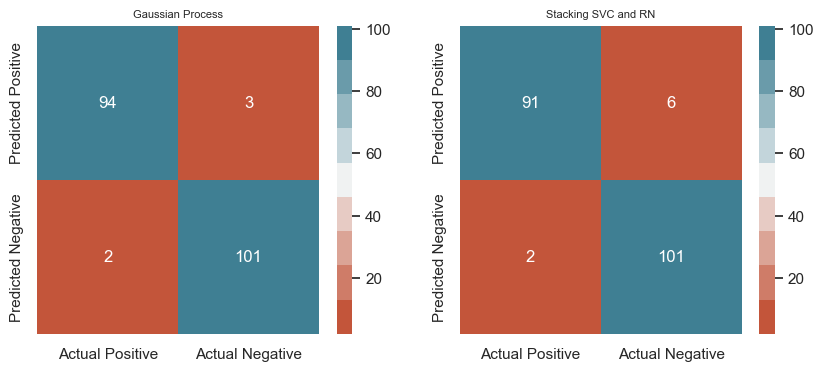

In [118]:
gp_cm = confusion_matrix(y_val, gpPredictions, labels=best_gp.classes_)
stacking_cm = confusion_matrix(y_val, stackingPredictions, labels=stackingclassifier.classes_)

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(gp_cm, ax=ax[0],cmap=color_palette,annot=True, fmt='g',xticklabels=['Actual Positive','Actual Negative'], \
            yticklabels=['Predicted Positive','Predicted Negative'])
sns.heatmap(stacking_cm, ax=ax[1],cmap=color_palette,annot=True, fmt='g',xticklabels=['Actual Positive','Actual Negative'], \
            yticklabels=['Predicted Positive','Predicted Negative'])
ax[0].set_title("Gaussian Process",fontsize=8)
ax[1].set_title("Stacking SVC and RN",fontsize=8)

plt.show()

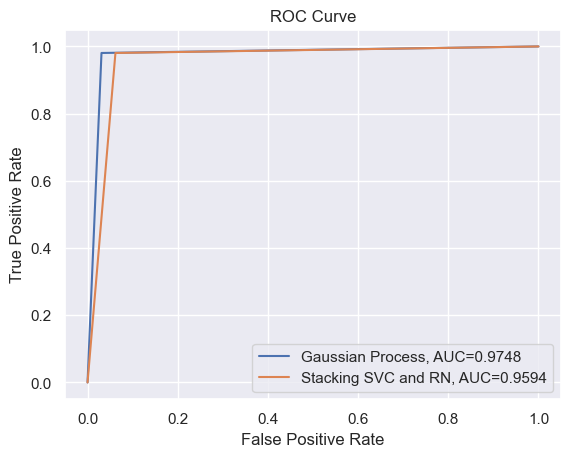

In [119]:
sns.set()

gproc1, gproc2, _ = roc_curve(y_val, gpPredictions)
gpauc = round(roc_auc_score(y_val, gpPredictions), 4)

stackingroc1, gstackingroc2, _ = roc_curve(y_val,stackingPredictions)
stackingauc = round(roc_auc_score(y_val, stackingPredictions), 4)

plt.title("ROC Curve")
plt.plot(gproc1,gproc2,label="Gaussian Process, AUC="+str(gpauc))
plt.plot(stackingroc1,gstackingroc2,label="Stacking SVC and RN, AUC="+str(stackingauc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()

plt.show()

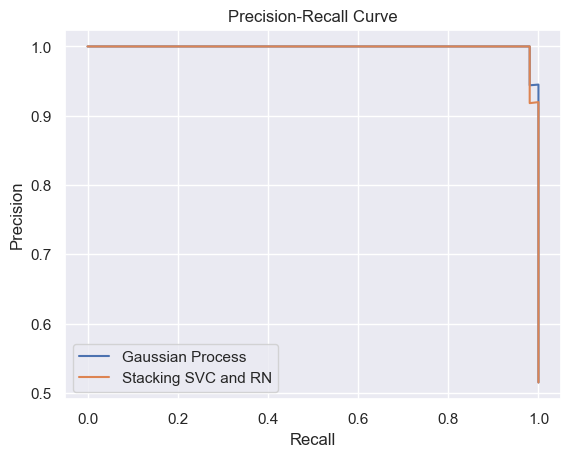

In [120]:
sns.set()

gp_precision, gp_recall, _ = precision_recall_curve(y_val, gpPredictions_proba[:,1])
stacking_precision, stacking_recall, _ = precision_recall_curve(y_val, stackingPredictions_proba[:,1])

plt.title("Precision-Recall Curve")

plt.plot(gp_recall,gp_precision,label="Gaussian Process")
plt.plot(stacking_recall,stacking_precision,label="Stacking SVC and RN")

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.legend()

plt.show()

In [121]:
print("The Gaussian Process model is",round(gp_run_time/stacking_run_time,1),"times larger than the Stacking Model.")

The Gaussian Process model is 28.1 times larger than the Stacking Model.


<a class="anchor" id="title8">

# 8. Analsing Final Model

In [122]:
final_model = best_gp 

<a class="anchor" id="title9">

# 9. Importing Test Data

In [123]:
# test dataset is imported using pandas
test_health = pd.read_excel('test_health.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_demo = pd.read_excel('test_demo.xlsx')

test_demo.set_index('PatientID',inplace=True)
test_health.set_index('PatientID',inplace=True)
test_habits.set_index('PatientID',inplace=True)

test_dataset = test_demo.join(test_health,how='inner')
test_dataset = test_dataset.join(test_habits,how='inner')

In [124]:
test_dataset['Birth_Year'] = year - test_dataset['Birth_Year']
test_dataset.rename(columns={"Birth_Year": "Age"},inplace =True)

In [125]:
test_dataset['Height']= test_dataset['Height']/100

In [126]:
test_dataset['IMC'] = test_dataset['Weight']/(test_dataset['Height']**2)

**Gender feature extraction**

In [127]:
test_dataset['Gender'] = test_dataset['Name'].map(lambda x: 'Male' if 'Mr.' in x else 'Female')

In [128]:
test_dataset['Mental_Health_Score'] = test_dataset['Mental_Health'].map(lambda x: 0 if x<=15 else 1);
test_dataset['Physical_Health_Score'] = test_dataset['Physical_Health'].map(lambda x: 0 if x<=15 else 1);
test_dataset['Non_Smoking_Habit'] = test_dataset['Smoking_Habit'].map(lambda x: 0 if x=='Yes' in x else 1)
test_dataset.drop('Smoking_Habit',inplace=True,axis=1)
test_dataset['Health_Score'] = test_dataset['Physical_Health_Score'] + test_dataset['Mental_Health_Score']
test_dataset['Habit_Score'] = test_dataset.loc[:,['Drinking_Habit','Fruit_Habit','Water_Habit','Exercise','Non_Smoking_Habit']].sum(axis=1);

**Fixing incosistencies in Region feature**

In [129]:
test_dataset.replace('LONDON','London',inplace = True)

**Feature Scaling**

In [130]:
test_scaled = scaler.transform(test_dataset[metric_features])

In [131]:
test_dataset[metric_features] = test_scaled

In [132]:
test_dataset[featuresToMap] = test_dataset[featuresToMap].applymap(mappingTransform)

In [133]:
features_selected.remove('Disease')
test_dataset = test_dataset[features_selected]
features_selected.append('Disease')
oh_feat = oneHotEncoder.transform(test_dataset[['Checkup']])
oh_feat_names = oneHotEncoder.get_feature_names_out()
oh_df = pd.DataFrame(oh_feat, index=test_dataset.index, columns=oh_feat_names)  # Why the index=df_ohc.index?
test_dataset = pd.concat([test_dataset.drop(columns=['Checkup']), oh_df], axis=1)
test_dataset

Diabetes  Fruit_Habit       Age  Physical_Health_Score  \
PatientID                                                           
1343              2            0 -0.307692                      0   
1727              3            0  0.000000                      0   
1828              2            0 -0.923077                      0   
1155              3            0 -0.153846                      0   
1020              2            0  0.307692                      0   
...             ...          ...       ...                    ...   
1000              0            2 -0.307692                      0   
1256              0            0 -1.615385                      0   
1318              0            1  0.230769                      0   
1953              0            0 -0.846154                      0   
1757              0            0  0.769231                      0   

           High_Cholesterol  Checkup_Less than three months  \
PatientID                                                     
1343              -0.648221                             0.0   
1727              -0.300395                             0.0   
1828              -0.110672                             0.0   
1155               1.090909                             0.0   
1020              -0.869565                             0.0   
...                     ...                             ...   
1000              -0.442688                             0.0   
1256              -0.901186                             0.0   
1318              -0.996047                             0.0   
1953              -0.063241                             0.0   
1757              -0.189723                             0.0   

           Checkup_More than 3 years  Checkup_Not sure  
PatientID                                               
1343                             0.0               1.0  
1727                             0.0               1.0  
1828                             1.0               0.0  
1155                             0.0               1.0  
1020                             1.0               0.0  
...                              ...               ...  
1000                             0.0               1.0  
1256                             1.0               0.0  
1318                             0.0               1.0  
1953                             1.0               0.0  
1757                             0.0               0.0  

[225 rows x 8 columns]

In [134]:
final_model.fit(X, y)

predictions= final_model.predict(test_dataset)

pd.concat([pd.Series(test_dataset.index),pd.Series(predictions,name='Disease')],axis=1).to_csv('Final_Submission.csv',index=False)